# P3 Concevez une application au service de la santé publique 

L'agence <span style='color:blue'> <a href = "http://www.santepubliquefrance.fr/">"*Santé publique France*" </a></span> a lancé un appel à projets pour trouver des idées innovantes d’applications en lien avec l'alimentation. <br>
Vous souhaitez y participer et proposer une idée d’application.

Le jeu de données <font color='orange'>Open Food Facts</font> est disponible sur le <a href = "https://world.openfoodfacts.org/">site officiel</a> (ou disponible à <a href ="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-scientist/P2/fr.openfoodfacts.org.products.csv.zip">ce lien</a> en téléchargement).
<br>
Les variables sont définies à <a href = "https://world.openfoodfacts.org/data/data-fields.txt">cette adresse</a>

Les champs sont séparés en quatre sections :

- Les informations générales sur la fiche du produit : nom, date de modification, etc.
- Un ensemble de tags : catégorie du produit, localisation, origine, etc.
- Les ingrédients composant les produits et leurs additifs éventuels.
- Des informations nutritionnelles : quantité en grammes d’un nutriment pour 100 grammes du produit.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import os

Erreur: pandas lors de l'import, certaines colonnes possèdent des valeurs de types differents:

Correction parametrer  l'argument low_memory à False

In [2]:
%%time
openfoodfacts = pd.read_csv("fr.openfoodfacts.org.products.csv",sep='\t',low_memory=False)

CPU times: total: 13.2 s
Wall time: 13.2 s


prendre 1 echant en parametre / 
figer typ de chaq col

Le code cidessous permet de créer un rapport automatisé de notre dataframe.

In [3]:
openfoodfacts.head(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN


%%time
from pandas_profiling import ProfileReport
profile = ProfileReport(openfoodfacts.sample(int(round(openfoodfacts.shape[0]*0.01,ndigits=0))), title="Pandas Profiling Report")
profile.to_file("output.html")

In [4]:
openfoodfacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


Le fichier comtient 106 variables numeriques et 56 varriables catégoriques

In [5]:
nbLigne, nbCol = openfoodfacts.shape
nbLigne, nbCol

(320772, 162)

### Etude du nombre de valeurs manquantes

In [6]:
nbNaVariable = pd.DataFrame(openfoodfacts.isnull().sum().sort_values(),columns = ["Nombre NA"])

In [7]:
nbNaVariable.head(10)

,Nombre NA
last_modified_t,0
last_modified_datetime,0
creator,2
created_t,3
created_datetime,9
code,23
url,23
states,46
states_tags,46
states_fr,46


On voit que 23 produits ne possède pas de code bar. Que sont ces produits?

In [8]:
openfoodfacts[openfoodfacts.code.isnull()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
189068,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France","en:belgium,en:france","Belgique,France","Lait entier, fruits : fraise (20 %), mangue (1...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189103,NaN,NaN,"villecomtal-sur-arros-gers-france,saint-just-c...","Villecresnes,Villeurbanne,France","Dia,Sogeres",France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189109,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,"Belgique,France, en:switzerland","en:belgium,en:france,en:switzerland","Belgique,France,Suisse","Lait entier 69.5 %, fruits : fraise 10 %, mang...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189119,NaN,NaN,villecomtal-sur-arros-gers-france,"Veynes,France",SuperU,France,en:france,France,"_Lait_ entier (78%), fruits : mangue, abricot...",Lait,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189152,NaN,NaN,villecomtal-sur-arros-gers-france,"Torcy 77,France",Carrefour,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189160,NaN,NaN,villecomtal-sur-arros-gers-france,France,NaN,France,en:france,France,"_Lait_ écrémé, fruits : fraise (12 %), cerise ...","Lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189162,NaN,NaN,villecomtal-sur-arros-gers-france,"Saint-Priest,France",Auchan,France,en:france,France,"_Lait_ écrémé, _lait_ écrémé concentré ou en p...","Lait, lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189168,NaN,NaN,villecomtal-sur-arros-gers-france,NaN,NaN,France,en:france,France,"_Lait_ entier (59,5 %), _lait_ écrémé concentr...","Lait, lait, crème, lactiques",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189242,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, rhubarbe (8 %), sucre (8 %), la...","Lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189244,NaN,NaN,villecomtal-sur-arros-gers-france,"Villers Bocage 80260,France",Carrefour market,France,en:france,France,"_Lait_ entier, ananas (8 %), sucre (7,1 %), _l...","Lait, lait, lait, lait",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ce sont des produits laitiers. Peut etre qu'il faut les supprimer.

In [9]:
openfoodfacts = openfoodfacts.loc[~openfoodfacts.code.isna()]

In [10]:
nbLigne, nbCol = openfoodfacts.shape
nbLigne, nbCol

(320749, 162)

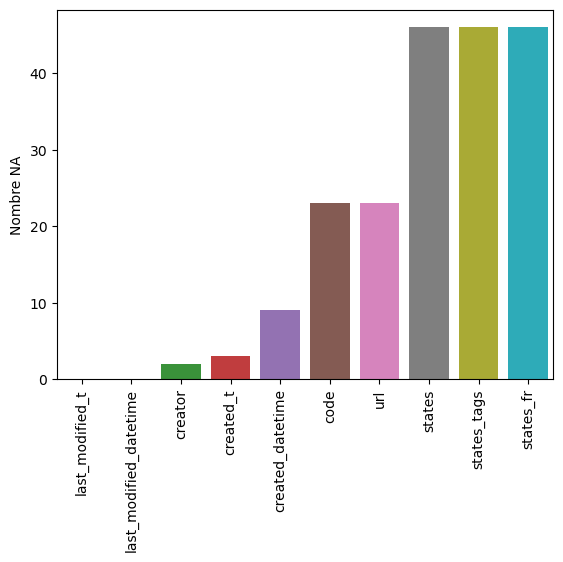

In [11]:
sns.barplot(x=nbNaVariable.index[:10],y=nbNaVariable['Nombre NA'].head(10))
plt.xticks(rotation=90);

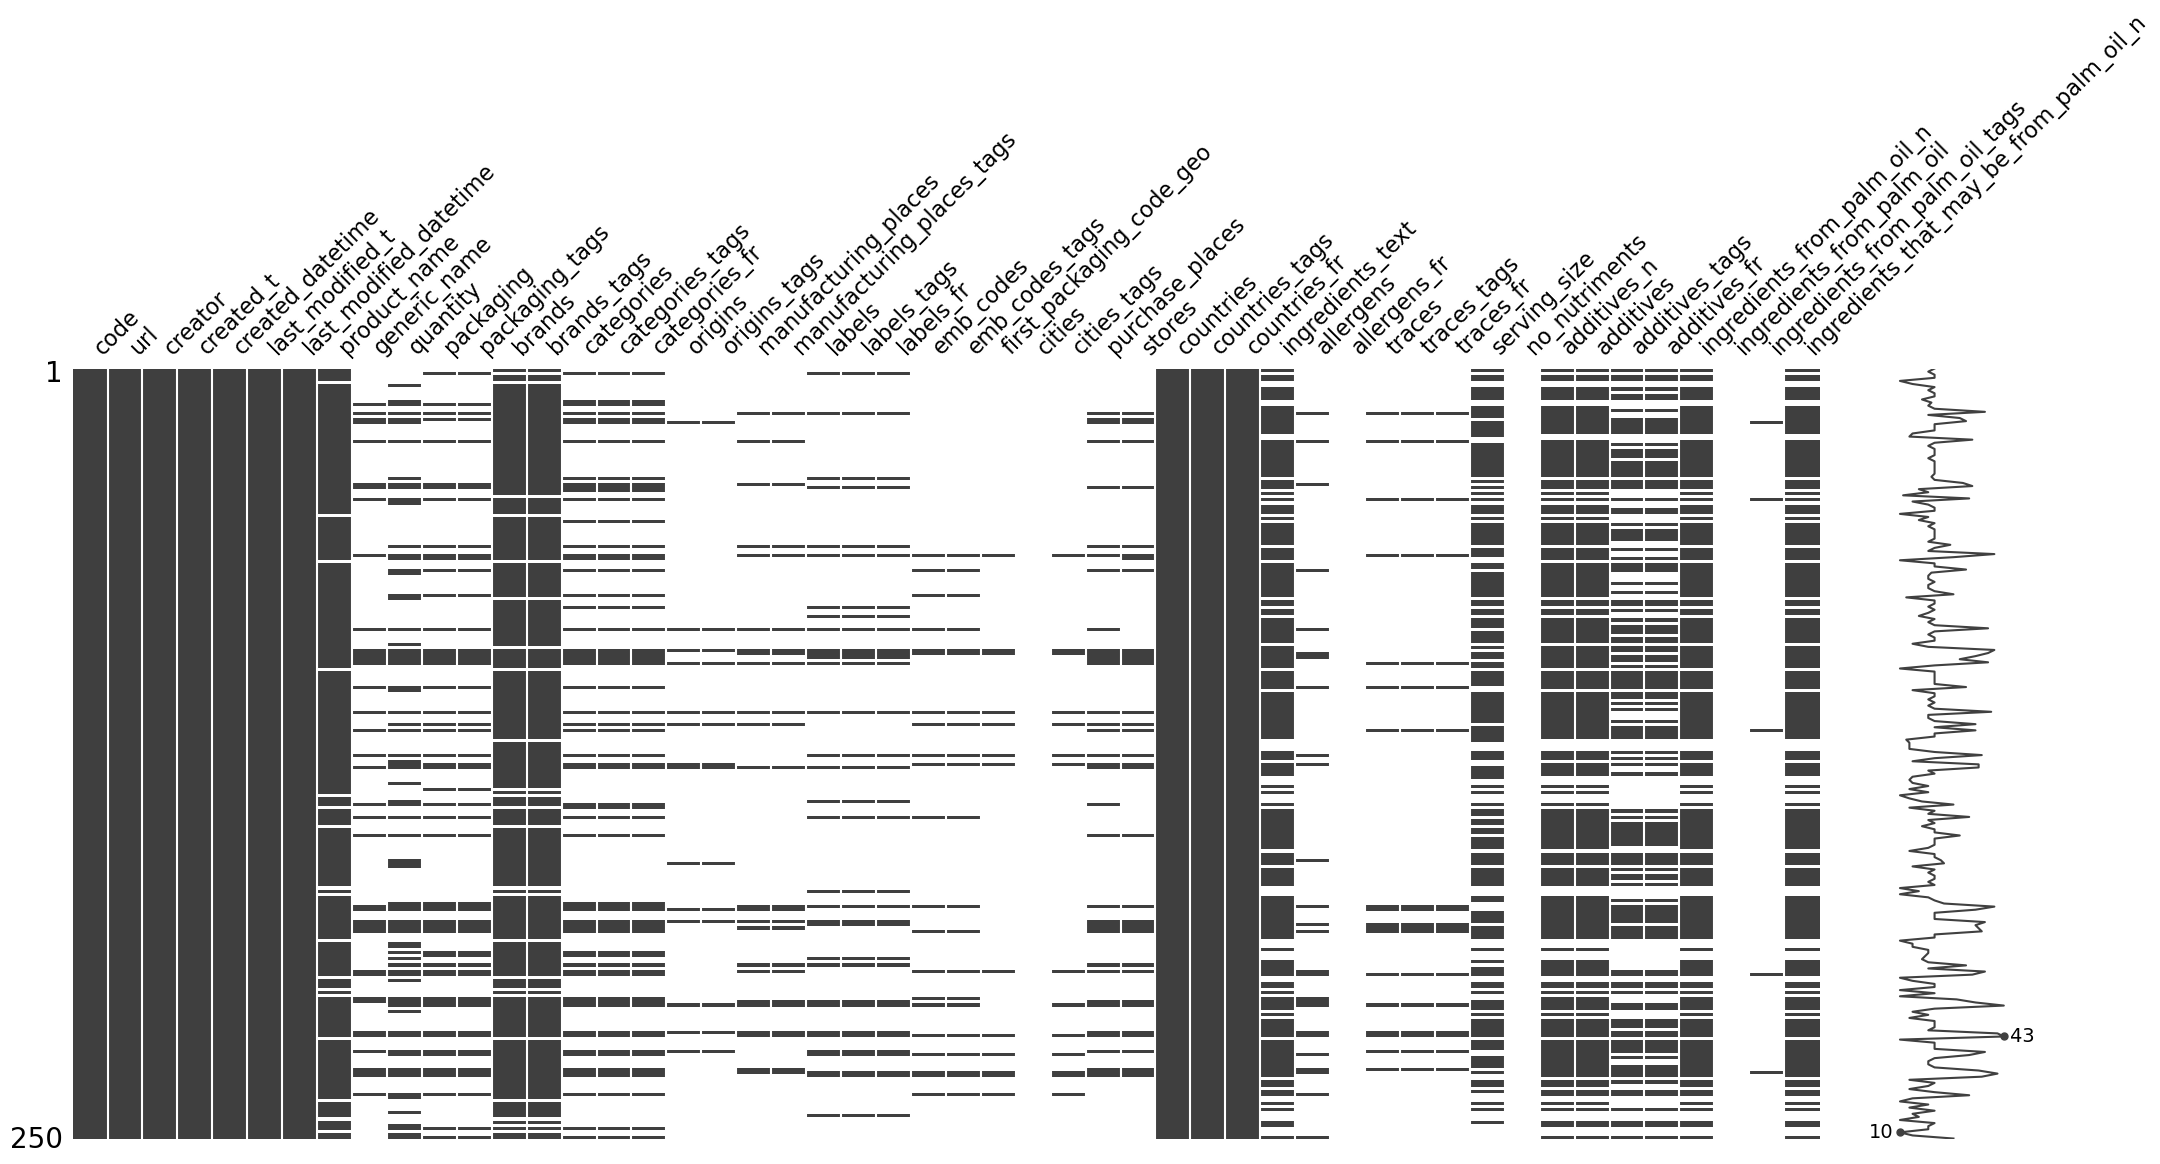

In [12]:
import missingno as msno
%matplotlib inline
msno.matrix(openfoodfacts.iloc[:,:50].sample(250));

### Doublons

In [13]:
openfoodfacts.duplicated().sum()

0

In [14]:
openfoodfacts.code.nunique()/openfoodfacts.shape[0]

1.0

In [15]:
openfoodfacts.code.str.replace('[a-zA-Z]','A',regex=True).str.replace('[0-9]','N',regex=True).value_counts()

NNNNNNNNNNNNN                                302985
NNNNNNNN                                      13851
NNNNNNNNNNN                                    2322
NNNNNNNNNNNN                                    825
NNNNNNNNNNNNNN                                  253
NNNNNNNNNN                                      136
NNNNNNN                                          96
NNNNNN                                           67
NNNN                                             34
NNNNNNNNNNNNNNN                                  31
NNNNNNNNNNNNNNNNNNNNNNNN                         31
NNNNN                                            20
NNNNNNNNNNNNNNNNNN                               20
NNNNNNNNN                                        18
NNNNNNNNNNNNNNNN                                 13
NNN                                               8
NNNNNNNNNNNNNNNNNNNNNN                            7
NN                                                7
NNNNNNNNNNNNNNNNNNNNNNNNNN                        5
N           

In [16]:
openfoodfacts.code.str.replace('[a-zA-Z]','A',regex=True).str.zfill(41).str.replace('[0-9]','N',regex=True).value_counts()

NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN    320749
Name: code, dtype: int64

In [17]:
openfoodfacts[openfoodfacts.code.str.zfill(41)=='00000000000000000000000000000000000016117'][['url']].iloc[1].values

array(['http://world-fr.openfoodfacts.org/produit/00016117/colossal-olives-with-jalapeno-peppers-trader-joe-s'],
      dtype=object)

### Clef primaire

In [18]:
openfoodfacts.code.sample(5)

168948    0873668000824
41025     0041250692140
318249    9012501000190
132725    0717854470148
189197    3033490905378
Name: code, dtype: object

# Etude des types de variables

In [19]:
pd.options.display.max_rows,pd.options.display.max_columns

(60, 20)

In [20]:
pd.set_option("display.max_rows", 60) #parametre le nombre de ligne affichable dans dataframe pandas
pd.set_option("expand_frame_repr", True) #permet de deplier les colonnes cachées
pd.set_option("display.max_columns",200 ) #permet d'afficher jusqu'à 200 colonnes dans une cellule

In [21]:
openfoodfacts.sample(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
210891,3256224061502,http://world-fr.openfoodfacts.org/produit/3256...,openfoodfacts-contributors,1462126569,2016-05-01T18:16:09Z,1462180001,2016-05-02T09:06:41Z,Sauce tomate épicée à base de poivrons et de p...,Sauce tomate épicée à base de poivrons et de p...,420 g,"Pot,Verre","pot,verre",U,u,"Epicerie,Sauces,Sauces pour pâtes,Sauces tomate","en:groceries,en:sauces,en:pasta-sauces,en:toma...","Epicerie,Sauces,Sauces pour pâtes,Sauces tomate",France,france,France,france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,"Purée et pulpe de tomates (France) 86,6 %, poi...",NaN,NaN,"Céleri,Gluten,Lait,Moutarde,Graines de sésame","en:celery,en:gluten,en:milk,en:mustard,en:sesa...","Céleri,Gluten,Lait,Moutarde,Graines de sésame",NaN,NaN,1.0,[ puree-et-pulpe-de-tomates -> fr:puree-et-pu...,en:e415,E415 - Gomme xanthane,0.0,NaN,NaN,0.0,NaN,NaN,NaN,b,Fat and sauces,Dressings and sauces,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:groceries,Epicerie,http://fr.openfoodfacts.org/images/products/32...,http://fr.openfoodfacts.org/images/products/32...,273.0,NaN,2.9,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.8,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.7,1.7,Na

In [22]:
nomColonnes = pd.DataFrame({'Colonnes':openfoodfacts.columns})

In [23]:
nomColonnes.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
Colonnes,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g


In [24]:
# Categoriser les types de colonnes
general_information = nomColonnes.Colonnes[:10].values.tolist()
tags = nomColonnes.Colonnes[10:34].values.tolist()
ingredients = nomColonnes.Colonnes[34:40].values.tolist()
misc_data = nomColonnes.Colonnes[40:63].values.tolist()
nutrition_facts = nomColonnes.Colonnes[63:157].values
nutrition_facts = np.append(nutrition_facts,nomColonnes.Colonnes[160:162].values).tolist()
score_foot_print = nomColonnes.Colonnes[157:160].values.tolist()

labels = nomColonnes.Colonnes[21:24].values.tolist()

#Remplir colonnes type_de_données
nomColonnes['type_de_colonne'] = ''
nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(general_information)] = "general_information"
nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(tags)] = "tags"
nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(ingredients)] = "ingredients"
nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(misc_data)] = "misc_data"
nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(nutrition_facts)] = "nutrition_facts"
nomColonnes.type_de_colonne[nomColonnes.Colonnes.isin(score_foot_print)] = "score_foot_print"

In [25]:
nomColonnes.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
Colonnes,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
type_de_colonne,general_information,general_information,general_information,general_information,general_information,general_information,general_information,general_information,general_information,general_information,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,tags,ingredients,ingredients,ingredients,ingredients,ingredients,ingredients,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,misc_data,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_facts,nutrition_fa

In [26]:
nomColonnes = nomColonnes.merge(right=nbNaVariable.reset_index(),left_on='Colonnes',right_on='index',how='left').drop(columns=['index'])

</br>

</br>

## Supprimer les colonnes en double

In [27]:
col_to_drop = []

In [28]:
# on gardera created_t a moins de valeurs manquantes
openfoodfacts.loc[openfoodfacts['created_t'].isna(),['created_t','created_datetime']]

,created_t,created_datetime


In [29]:
def etude_col(col1,col2):
    
    print("Le nombre de valeurs manquantes:")
    print(openfoodfacts[[col1,col2]].isna().sum()*100/nbLigne)
    print('\n')
    
    print("La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:")
    col_etud = [col1,col2][np.argmin(openfoodfacts[[col1,col2]].isna().sum())]
    print(openfoodfacts.loc[openfoodfacts[col_etud].isna(),[col1,col2]])
    print('\n')
    
    print("La valeurs manquantes de l'autre colonne:")
    col_etud2 = [col1,col2][np.argmax(openfoodfacts[[col1,col2]].isna().sum())]
    print(openfoodfacts.loc[openfoodfacts[col_etud2].isna(),[col1,col2]])
    print('\n')
    
    print("Un echantillon:")
    print(openfoodfacts[[col1,col2]].dropna().sample(5))
    print('\n')
    

    
    
    print("Repartition des regex:")
    test = openfoodfacts[[col1,col2]];
    print(test[col1].str.lower().str.replace('[a-z]','a',regex='True').str.replace('[0-9]','N',regex='True').value_counts())
    print('\n')
    return test
    # peut-on remplacer created_t par created_datetime
    # print(test_packaging[['packaging','packaging_tags']][test_packaging.packaging.str.lower().str.replace('[a-z]','a',regex='True').str.replace('[0-9]','N',regex='True')!='NNNNNNNNNN'])

In [30]:
nomColonnes[['Colonnes']].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
Colonnes,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g


</br>

</br>

### product_name    generic_name

In [31]:
openfoodfacts.loc[~openfoodfacts['generic_name'].isna(),['product_name','generic_name']].sample(5)

,product_name,generic_name
175759,Café Agua Blanca Colombie - Anchored Coffee,Café en grains
207502,Sauce Américaine,Sauce américaine
215242,Top Cao fourré au lait,Spécialité céréalière chocolatée fourrée au la...
225320,"Ma dose choco (1,1 % MG) 6 pots",Dessert lacté au chocolat
82781,Swiss knight,Fromage fondu tartiner avec gruyèere


In [32]:
col1,col2 = 'product_name','generic_name'
test = etude_col(col1,col2)



Le nombre de valeurs manquantes:
product_name     5.537663
generic_name    83.546948
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
       product_name                    generic_name
48              NaN                             NaN
183             NaN                             NaN
187             NaN  Bonbons acidulés Raisin Fraise
227             NaN                             NaN
233             NaN                             NaN
...             ...                             ...
320747          NaN                             NaN
320748          NaN                             NaN
320752          NaN                             NaN
320755          NaN                             NaN
320766          NaN                             NaN

[17762 rows x 2 columns]


La valeurs manquantes de l'autre colonne:
                                             product_name generic_name
0                                      Farine de blé no

</br>

</br>

### created_t ou created_datetime

In [33]:
col1,col2 = 'created_t','created_datetime'
test = etude_col(col1,col2)

print('\n')
print('Les valeurs "erronnées" de {} peuvent etre elle remplacée par des valeurs correctes de {}'.format(col1,col2))
print(test[[col1,col2]][test[col1].str.lower().str.replace('[a-z]','a',regex='True').str.replace('[0-9]','N',regex='True')!='NNNNNNNNNN'])

Le nombre de valeurs manquantes:
created_t           0.000000
created_datetime    0.000312
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
Empty DataFrame
Columns: [created_t, created_datetime]
Index: []


La valeurs manquantes de l'autre colonne:
       created_t created_datetime
187478         0              NaN


Un echantillon:
         created_t      created_datetime
312158  1390694220  2014-01-25T23:57:00Z
78596   1489095005  2017-03-09T21:30:05Z
115647  1473946407  2016-09-15T13:33:27Z
306628  1419859340  2014-12-29T13:22:20Z
119724  1489077168  2017-03-09T16:32:48Z


Repartition des regex:
NNNNNNNNNN    320748
N                  1
Name: created_t, dtype: int64




Les valeurs "erronnées" de created_t peuvent etre elle remplacée par des valeurs correctes de created_datetime
       created_t created_datetime
187478         0              NaN


In [34]:
# created_t possede des erreurs

In [35]:
# on gardera created_t qui a moins de valeurs manquantes

In [36]:
col_to_drop.append("created_datetime")

</br>

</br>

### last_modified_t    last_modified_datetime

In [37]:
col1,col2 = 'last_modified_t','last_modified_datetime'
test = etude_col(col1,col2)

Le nombre de valeurs manquantes:
last_modified_t           0.0
last_modified_datetime    0.0
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
Empty DataFrame
Columns: [last_modified_t, last_modified_datetime]
Index: []


La valeurs manquantes de l'autre colonne:
Empty DataFrame
Columns: [last_modified_t, last_modified_datetime]
Index: []


Un echantillon:
       last_modified_t last_modified_datetime
308653      1406755469   2014-07-30T21:24:29Z
211754      1490125653   2017-03-21T19:47:33Z
70496       1489056552   2017-03-09T10:49:12Z
268092      1489075211   2017-03-09T16:00:11Z
251119      1380126328   2013-09-25T16:25:28Z


Repartition des regex:
NNNNNNNNNN    320749
Name: last_modified_t, dtype: int64




In [38]:
print('Les valeurs "erronnées" de "{}" peuvent etre-elle remplacées par des valeurs correctes de "{}"'.format(col1,col2))
erreurs_val = 'NNNNNNNNNN'
print(test[[col1,col2]][test[col1].str.lower().str.replace('[a-z]','a',regex='True').str.replace('[0-9]','N',regex='True')!=erreurs_val])

Les valeurs "erronnées" de "last_modified_t" peuvent etre-elle remplacées par des valeurs correctes de "last_modified_datetime"
Empty DataFrame
Columns: [last_modified_t, last_modified_datetime]
Index: []


In [39]:
col_to_drop.append("last_modified_datetime")

</br>

</br>

</br>

### packaging   packaging_tags

In [40]:
col1,col2 = 'packaging','packaging_tags'
test = etude_col(col1,col2)

Le nombre de valeurs manquantes:
packaging         75.382620
packaging_tags    75.382308
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
       packaging packaging_tags
0            NaN            NaN
1            NaN            NaN
2            NaN            NaN
3            NaN            NaN
4            NaN            NaN
...          ...            ...
320759       NaN            NaN
320760       NaN            NaN
320762       NaN            NaN
320764       NaN            NaN
320770       NaN            NaN

[241788 rows x 2 columns]


La valeurs manquantes de l'autre colonne:
       packaging packaging_tags
0            NaN            NaN
1            NaN            NaN
2            NaN            NaN
3            NaN            NaN
4            NaN            NaN
...          ...            ...
320759       NaN            NaN
320760       NaN            NaN
320762       NaN            NaN
320764       NaN            NaN
320770   

In [41]:
openfoodfacts[(openfoodfacts.packaging.isna() & ~openfoodfacts.packaging_tags.isna())][['packaging','packaging_tags']]

,packaging,packaging_tags
176184,NaN,n-a
320353,NaN,n-a
320354,NaN,n-a


In [42]:
openfoodfacts[(~openfoodfacts.packaging.isna() & openfoodfacts.packaging_tags.isna())][['packaging','packaging_tags']]

,packaging,packaging_tags
298974,",",NaN
306911,",",NaN


In [43]:
col_to_drop.append("packaging_tags")

In [44]:
print('Les valeurs "erronnées" de "{}" peuvent etre-elle remplacées par des valeurs correctes de "{}"'.format(col1,col2))
erreurs_val = 'NNNNNNNNNN'
print(test[[col1,col2]][test[col1].str.lower().str.replace('[a-z]','a',regex='True').str.replace('[0-9]','N',regex='True')!=erreurs_val])

Les valeurs "erronnées" de "packaging" peuvent etre-elle remplacées par des valeurs correctes de "packaging_tags"
        packaging packaging_tags
0             NaN            NaN
1             NaN            NaN
2             NaN            NaN
3             NaN            NaN
4             NaN            NaN
...           ...            ...
320767  Plastique      plastique
320768  Plastique      plastique
320769  Plastique      plastique
320770        NaN            NaN
320771  Plastique      plastique

[320749 rows x 2 columns]


</br>

</br>

### brands  brands_tags

In [45]:
col1,col2 = "brands","brands_tags"
test = etude_col(col1,col2)

Le nombre de valeurs manquantes:
brands         8.850846
brands_tags    8.853340
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
       brands brands_tags
1         NaN         NaN
46        NaN         NaN
47        NaN         NaN
48        NaN         NaN
125       NaN         NaN
...       ...         ...
320755    NaN         NaN
320756    NaN         NaN
320760    NaN         NaN
320764    NaN         NaN
320766    NaN         NaN

[28389 rows x 2 columns]


La valeurs manquantes de l'autre colonne:
       brands brands_tags
1         NaN         NaN
46        NaN         NaN
47        NaN         NaN
48        NaN         NaN
125       NaN         NaN
...       ...         ...
320755    NaN         NaN
320756    NaN         NaN
320760    NaN         NaN
320764    NaN         NaN
320766    NaN         NaN

[28397 rows x 2 columns]


Un echantillon:
                                     brands                      brands_tags
255452   

In [46]:
openfoodfacts[(openfoodfacts.brands.isna() & ~openfoodfacts.brands_tags.isna())][['brands','brands_tags']]

,brands,brands_tags
248232,NaN,na
248234,NaN,na


In [47]:
openfoodfacts[(~openfoodfacts.brands.isna() & openfoodfacts.brands_tags.isna())][['brands','brands_tags']]

,brands,brands_tags
181735,?,NaN
184680,/,NaN
186293,/,NaN
191673,??,NaN
214446,--,NaN
234219,.,NaN
251895,?,NaN
264513,-,NaN
304555,?,NaN
306163,?,NaN


In [48]:
col_to_drop.append("brands_tags")

</br>

</br>

</br>

### categories categories_tags categories_fr

In [49]:
#categories	categories_tags','categories_fr
col1,col2 = 'categories','categories_tags'
openfoodfacts[['categories','categories_tags','categories_fr']].isna().sum()/nbLigne

categories         0.7369
categories_tags    0.7369
categories_fr      0.7369
dtype: float64

In [50]:
openfoodfacts.categories.unique()

array([nan, 'Filet de bœuf', 'Légumes-feuilles', ...,
       'Boissons,Boissons alcoolisées,Vins,Vins blancs,Roussette du Bugey',
       'pl:Szprot',
       "Viandes,Produits à tartiner,Charcuteries,Produits à tartiner salés,Rillettes,Rillettes de viande,Rillettes de viande blanche,Rillettes de volaille,Rillettes d'oie"],
      dtype=object)

In [51]:
col_to_drop+=['categories','categories_tags']

In [52]:
openfoodfacts.categories_fr.str.lower().str.replace('[^a-z0-9éàèœ, ]',' ',regex=True).unique()

array([nan, 'filet de boeuf',
       'aliments et boissons à base de végétaux,aliments d origine végétale,frais,aliments à base de fruits et de légumes,aliments à base de plantes frais,légumes et dérivés,légumes frais,légumes feuilles',
       ...,
       'aliments et boissons à base de végétaux,aliments d origine végétale,aliments à base de fruits et de légumes,fruits et produits dérivés,fruits,agrumes,limes,ru     ',
       'boissons,boissons alcoolisées,vins,vins fran ais,vins blancs,bugey',
       'pl szprot'], dtype=object)

</br>

</br>

</br>

### origins	origins_tags	

In [53]:
col1,col2 = "origins","origins_tags"
test = etude_col(col1,col2)

Le nombre de valeurs manquantes:
origins         93.088677
origins_tags    93.100212
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
       origins origins_tags
0          NaN          NaN
1          NaN          NaN
2          NaN          NaN
3          NaN          NaN
4          NaN          NaN
...        ...          ...
320767     NaN          NaN
320768     NaN          NaN
320769     NaN          NaN
320770     NaN          NaN
320771     NaN          NaN

[298581 rows x 2 columns]


La valeurs manquantes de l'autre colonne:
       origins origins_tags
0          NaN          NaN
1          NaN          NaN
2          NaN          NaN
3          NaN          NaN
4          NaN          NaN
...        ...          ...
320767     NaN          NaN
320768     NaN          NaN
320769     NaN          NaN
320770     NaN          NaN
320771     NaN          NaN

[298618 rows x 2 columns]


Un echantillon:
                  origins       

In [54]:
col_to_drop+=["origins","origins_tags"]

</br>

</br>

</br>

### manufacturing_places    manufacturing_places_tags

In [55]:
col1,col2 = "manufacturing_places","manufacturing_places_tags"
test = etude_col(col1,col2)

Le nombre de valeurs manquantes:
manufacturing_places         88.626933
manufacturing_places_tags    88.628803
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
       manufacturing_places manufacturing_places_tags
0                       NaN                       NaN
1                       NaN                       NaN
2                       NaN                       NaN
3                       NaN                       NaN
4                       NaN                       NaN
...                     ...                       ...
320767                  NaN                       NaN
320768                  NaN                       NaN
320769                  NaN                       NaN
320770                  NaN                       NaN
320771                  NaN                       NaN

[284270 rows x 2 columns]


La valeurs manquantes de l'autre colonne:
       manufacturing_places manufacturing_places_tags
0                    

In [56]:
col_to_drop += ["manufacturing_places","manufacturing_places_tags"]

</br>

</br>

</br>

### labels labels_tags labels_fr

In [57]:
openfoodfacts[['labels','labels_tags','labels_fr']].isna().sum()/nbLigne

labels         0.854843
labels_tags    0.854578
labels_fr      0.854578
dtype: float64

In [58]:
col1,col2 = "labels","labels_tags"
test = etude_col(col1,col2)

Le nombre de valeurs manquantes:
labels         85.484288
labels_tags    85.457788
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
       labels labels_tags
0         NaN         NaN
1         NaN         NaN
2         NaN         NaN
3         NaN         NaN
4         NaN         NaN
...       ...         ...
320767    NaN         NaN
320768    NaN         NaN
320769    NaN         NaN
320770    NaN         NaN
320771    NaN         NaN

[274105 rows x 2 columns]


La valeurs manquantes de l'autre colonne:
       labels labels_tags
0         NaN         NaN
1         NaN         NaN
2         NaN         NaN
3         NaN         NaN
4         NaN         NaN
...       ...         ...
320767    NaN         NaN
320768    NaN         NaN
320769    NaN         NaN
320770    NaN         NaN
320771    NaN         NaN

[274190 rows x 2 columns]


Un echantillon:
                                                   labels  \
208935               

In [59]:
col_to_drop+=['labels' ,'labels_fr' , 'labels_tags']

</br>

</br>

</br>

### emb_codes	emb_codes_tags	

In [60]:
openfoodfacts[['emb_codes','emb_codes_tags']].isna().sum()/nbLigne

emb_codes         0.908633
emb_codes_tags    0.908645
dtype: float64

In [61]:
col1,col2 = "emb_codes","emb_codes_tags"
test = etude_col(col1,col2)

Le nombre de valeurs manquantes:
emb_codes         90.863261
emb_codes_tags    90.864508
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
       emb_codes emb_codes_tags
0            NaN            NaN
1            NaN            NaN
2            NaN            NaN
3            NaN            NaN
4            NaN            NaN
...          ...            ...
320767       NaN            NaN
320768       NaN            NaN
320769       NaN            NaN
320770       NaN            NaN
320771       NaN            NaN

[291443 rows x 2 columns]


La valeurs manquantes de l'autre colonne:
       emb_codes emb_codes_tags
0            NaN            NaN
1            NaN            NaN
2            NaN            NaN
3            NaN            NaN
4            NaN            NaN
...          ...            ...
320767       NaN            NaN
320768       NaN            NaN
320769       NaN            NaN
320770       NaN            NaN
320771   

In [62]:
col_to_drop+=["emb_codes","emb_codes_tags"]

</br>

</br>

</br>

### cities   cities_tags

In [63]:
openfoodfacts[['cities','cities_tags']].isna().sum()/nbLigne

cities         1.00000
cities_tags    0.93672
dtype: float64

In [64]:
openfoodfacts.cities_tags.unique()

array([nan, 'brignemont-haute-garonne-france',
       'saint-didier-au-mont-d-or-rhone-france', ..., 'luchy-oise-france',
       'evry-essonne-france,verrieres-le-buisson-essonne-france',
       'arles-bouches-du-rhone-france'], dtype=object)

In [65]:
openfoodfacts[~openfoodfacts.cities_tags.isna()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
284,00003100,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1415119256,2014-11-04T16:40:56Z,1428327438,2015-04-06T13:37:18Z,Chair à saucisse,NaN,792 g,"Barquette,Plastique","barquette,plastique",Sovivo,sovivo,Viandes de porc,"en:meats,en:pork","Viandes,Porc",France,france,France,france,NaN,NaN,NaN,FR 31.090.010 EC,fr-31-090-010-ec,"43.783333,0.983333",NaN,brignemont-haute-garonne-france,NaN,NaN,France,en:france,France,"Viandes de porc (86%), eau, acidifiant (E326),...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,[ viandes-de-porc -> fr:viandes-de-porc ] [...,"en:e326,en:e263,en:e621,en:e316,en:e120,en:e150c","E326 - Lactate de potassium,E263 - Acétate de ...",0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Fish Meat Eggs,Meat,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:meats,Viandes,http://fr.openfoodfacts.org/images/products/00...,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [66]:
col_to_drop+=['cities','cities_tags']

</br>

</br>

</br>

### countries    countries_tags     countries_fr 

In [67]:
openfoodfacts[['countries','countries_tags','countries_fr']].isna().sum()/nbLigne

countries         0.000873
countries_tags    0.000873
countries_fr      0.000873
dtype: float64

In [68]:
openfoodfacts.countries.nunique()

1428

In [69]:
openfoodfacts.countries_tags.nunique()

719

In [70]:
openfoodfacts.countries_fr.unique()

array(['France', 'États-Unis', 'Royaume-Uni', 'France,États-Unis',
       'Canada', 'Suisse', 'Espagne', 'Allemagne', 'Slovénie', 'Italie',
       'Roumanie', 'Australie', 'Portugal', 'France,Royaume-Uni',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Guadeloupe', nan,
       'Royaume-Uni,États-Unis', 'Canada,États-Unis', 'Pays-Bas',
       'Australie,France', 'Canada,France,Suisse,États-Unis',
       'France,États-Unis,en:Etats-unis', 'Irlande', 'France,La Réunion',
       'Taiwan', 'Australie,Suisse', 'France,Allemagne', 'Brésil',
       'Belgique,France', 'République dominicaine',
       'États-Unis,en:Australie', 'Arabie saoudite',
       'Émirats arabes unis', 'Irak', 'Koweït', 'Moldavie', 'Belgique',
       'Nouvelle-Calédonie', 'Singapour', 'Finlande',
       'Australie,États-Unis', 'France,Suisse',
       'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis',
       'Polynésie française', 'Panama', 'Costa Rica', 'Mexique',
       'États-Unis,en:Pays-bas', 'Espagne,Royau

In [71]:
openfoodfacts[['countries','countries_tags','countries_fr']].isna().sum()/nbLigne

countries         0.000873
countries_tags    0.000873
countries_fr      0.000873
dtype: float64

</br>

</br>

</br>

### allergens	allergens_fr

In [72]:
openfoodfacts[['allergens','allergens_fr']].isna().sum()/nbLigne

allergens       0.911691
allergens_fr    1.000000
dtype: float64

In [73]:
openfoodfacts.allergens.unique()

array([nan, 'Blé, Beurre, Oeufs, Noisette',
       'Vollmilchpulver, Vollmilchpulver, Soja, Butterreinfett, Haselnusskerne, Soja, Mandeln, Pisatazien, Magermilchpulver',
       ..., 'Poisson, Poisson', 'ORGE, CELERI',
       'Milk, hazelnuts, NUTS, WHEAT'], dtype=object)

In [74]:
col_to_drop.append('allergens')
col_to_drop.append('allergens_fr')

</br>

</br>

</br>

### traces	traces_tags	traces_fr

In [75]:
openfoodfacts[['traces','traces_tags','traces_fr']].isna().sum()/nbLigne

traces         0.924146
traces_tags    0.924149
traces_fr      0.924149
dtype: float64

In [76]:
openfoodfacts.traces.unique()

array([nan, 'milk, egg, ',
       'nuts, milk, soya, wheatflour, gluten, oatmeal, egg', ...,
       'S. thermophilus,L. acidophilus,Bifidobacterium,L. casei,cow milk',
       'Fish,Gluten,Molluscs,Soybeans',
       'soja,oeufs,lait,graines de sésame'], dtype=object)

In [77]:
col_to_drop+=['traces','traces_tags','traces_fr']

</br>

</br>

</br>

### additives_n	additives	additives_tags	additives_fr	

In [78]:
openfoodfacts[['additives_n','additives','additives_tags','additives_fr']].isna().sum()/nbLigne

additives_n       0.223882
additives         0.223988
additives_tags    0.517754
additives_fr      0.517754
dtype: float64

In [79]:
openfoodfacts.additives_tags.unique()

array([nan, 'en:e123,en:e307a', 'en:e100', ...,
       'en:e260,en:e415,en:e14xx',
       'en:e500ii,en:e450,en:e471,en:e481,en:e1101',
       'en:e330,en:e951,en:e150a,en:e950,en:e552,en:e102,en:e129'],
      dtype=object)

In [80]:
col_to_drop+=['additives_n','additives','additives_tags','additives_fr']

</br>

</br>

</br>

### ingredients_from_palm_oil_n	ingredients_from_palm_oil	ingredients_from_palm_oil_tags

### ingredients_that_may_be_from_palm_oil_n	ingredients_that_may_be_from_palm_oil	ingredients_that_may_be_from_palm_oil_tags

In [81]:
openfoodfacts[['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']].corr()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
ingredients_from_palm_oil_n,1.000000,0.186849
ingredients_that_may_be_from_palm_oil_n,0.186849,1.000000


In [82]:
openfoodfacts[['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']].sample(10)

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
270326,NaN,NaN
111485,NaN,NaN
248285,NaN,NaN
90155,0.0,0.0
151504,0.0,0.0
33439,0.0,0.0
98545,0.0,0.0
156343,0.0,0.0
292010,0.0,1.0
68426,0.0,0.0


In [83]:
openfoodfacts[['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']].describe()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n
count,248939.000000,248939.000000
mean,0.019659,0.055246
std,0.140524,0.269207
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,2.000000,6.000000


In [84]:
openfoodfacts[['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil','ingredients_that_may_be_from_palm_oil_tags']].isna().sum()/nbLigne

ingredients_from_palm_oil_n                   0.223882
ingredients_that_may_be_from_palm_oil_n       0.223882
ingredients_that_may_be_from_palm_oil         1.000000
ingredients_that_may_be_from_palm_oil_tags    0.963535
dtype: float64

In [85]:
openfoodfacts['from_palm_oil_n'] = openfoodfacts[['ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n']].fillna(0).sum(axis=0)

In [86]:
col_to_drop+=['ingredients_that_may_be_from_palm_oil','ingredients_that_may_be_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_tags']
col_to_drop+=['ingredients_from_palm_oil_n','ingredients_from_palm_oil','ingredients_from_palm_oil_tags']

</br>

</br>

</br>

### nutrition_grade_uk	nutrition_grade_fr

In [87]:
openfoodfacts[['nutrition_grade_uk','nutrition_grade_fr']].isna().sum()

nutrition_grade_uk    320749
nutrition_grade_fr     99539
dtype: int64

In [88]:
openfoodfacts[['nutrition_grade_uk','nutrition_grade_fr']].isna().sum()/nbLigne

nutrition_grade_uk    1.000000
nutrition_grade_fr    0.310333
dtype: float64

In [89]:
openfoodfacts.nutrition_grade_fr.value_counts()

d    62763
c    45538
e    43030
a    35634
b    34245
Name: nutrition_grade_fr, dtype: int64

In [90]:
openfoodfacts.nutrition_grade_uk.value_counts()

Series([], Name: nutrition_grade_uk, dtype: int64)

In [91]:
col_to_drop.append('nutrition_grade_uk')

</br>

</br>

</br>

### pnns_groups_1	pnns_groups_2

In [92]:
col1,col2 = 'pnns_groups_1','pnns_groups_2'
test = etude_col(col1,col2)

Le nombre de valeurs manquantes:
pnns_groups_1    71.468968
pnns_groups_2    70.540516
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
       pnns_groups_1 pnns_groups_2
0                NaN           NaN
1                NaN           NaN
2                NaN           NaN
3                NaN           NaN
4                NaN           NaN
...              ...           ...
320764           NaN           NaN
320767           NaN           NaN
320768           NaN           NaN
320770           NaN           NaN
320771           NaN           NaN

[226258 rows x 2 columns]


La valeurs manquantes de l'autre colonne:
       pnns_groups_1 pnns_groups_2
0                NaN           NaN
1                NaN           NaN
2                NaN           NaN
3                NaN           NaN
4                NaN           NaN
...              ...           ...
320764           NaN           NaN
320767           NaN           NaN
320768      

</br>

</br>

</br>

### states	states_tags	states_fr

In [93]:
col1,col2 = 'states_fr','states_tags'
test = etude_col(col1,col2)

Le nombre de valeurs manquantes:
states_fr      0.007171
states_tags    0.007171
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
       states_fr states_tags
189067       NaN         NaN
189102       NaN         NaN
189108       NaN         NaN
189118       NaN         NaN
189151       NaN         NaN
189159       NaN         NaN
189161       NaN         NaN
189167       NaN         NaN
189241       NaN         NaN
189243       NaN         NaN
189247       NaN         NaN
189249       NaN         NaN
189259       NaN         NaN
189261       NaN         NaN
189268       NaN         NaN
189271       NaN         NaN
189344       NaN         NaN
189361       NaN         NaN
189363       NaN         NaN
189378       NaN         NaN
189403       NaN         NaN
189405       NaN         NaN
189416       NaN         NaN


La valeurs manquantes de l'autre colonne:
       states_fr states_tags
189067       NaN         NaN
189102       NaN         N

In [94]:
col_to_drop+=['states','states_tags','states_fr']

</br>

</br>

</br>

### main_category	main_category_fr

In [95]:
col1,col2 = 'main_category','main_category_fr'
test = etude_col(col1,col2)

Le nombre de valeurs manquantes:
main_category       73.69719
main_category_fr    73.69719
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
       main_category main_category_fr
0                NaN              NaN
1                NaN              NaN
2                NaN              NaN
3                NaN              NaN
4                NaN              NaN
...              ...              ...
320764           NaN              NaN
320767           NaN              NaN
320768           NaN              NaN
320770           NaN              NaN
320771           NaN              NaN

[236383 rows x 2 columns]


La valeurs manquantes de l'autre colonne:
       main_category main_category_fr
0                NaN              NaN
1                NaN              NaN
2                NaN              NaN
3                NaN              NaN
4                NaN              NaN
...              ...              ...
320764           NaN 

In [96]:
col_to_drop.append('main_category')

</br>

</br>

</br>

### image_url   image_small_url

In [97]:
col1,col2 = 'image_url','image_small_url'
test = etude_col(col1,col2)

Le nombre de valeurs manquantes:
image_url          76.35659
image_small_url    76.35659
dtype: float64


La valeurs manquantes de la colonne possedant le moins de valeurs manquantes:
       image_url image_small_url
0            NaN             NaN
1            NaN             NaN
2            NaN             NaN
3            NaN             NaN
4            NaN             NaN
...          ...             ...
320766       NaN             NaN
320767       NaN             NaN
320768       NaN             NaN
320770       NaN             NaN
320771       NaN             NaN

[244913 rows x 2 columns]


La valeurs manquantes de l'autre colonne:
       image_url image_small_url
0            NaN             NaN
1            NaN             NaN
2            NaN             NaN
3            NaN             NaN
4            NaN             NaN
...          ...             ...
320766       NaN             NaN
320767       NaN             NaN
320768       NaN             NaN
320770       NaN   

In [98]:
col_to_drop+=['image_url','image_small_url']

</br>

</br>

### nutrition-score-fr_100g	nutrition-score-uk_100g

In [99]:
openfoodfacts[['nutrition-score-fr_100g','nutrition-score-uk_100g']].isna().sum()/nbLigne

nutrition-score-fr_100g    0.310333
nutrition-score-uk_100g    0.310333
dtype: float64

In [100]:
openfoodfacts[['nutrition-score-fr_100g','nutrition-score-uk_100g']].corr()

,nutrition-score-fr_100g,nutrition-score-uk_100g
nutrition-score-fr_100g,1.00000,0.98622
nutrition-score-uk_100g,0.98622,1.00000


In [101]:
openfoodfacts[(~openfoodfacts['nutrition-score-fr_100g'].isna() & openfoodfacts['nutrition-score-uk_100g'].isna())][['nutrition-score-fr_100g','nutrition-score-uk_100g']]

,nutrition-score-fr_100g,nutrition-score-uk_100g


In [102]:
col_to_drop.append('nutrition-score-uk_100g')

In [103]:
len(col_to_drop)

40

In [104]:
%whos

Variable              Type         Data/Info
--------------------------------------------
col1                  str          image_url
col2                  str          image_small_url
col_to_drop           list         n=40
erreurs_val           str          NNNNNNNNNN
etude_col             function     <function etude_col at 0x0000019F20430DC0>
general_information   list         n=10
ingredients           list         n=6
labels                list         n=3
misc_data             list         n=23
msno                  module       <module 'missingno' from <...>\missingno\\__init__.py'>
nbCol                 int          162
nbLigne               int          320749
nbNaVariable          DataFrame                             <...>n\n[162 rows x 1 columns]
nomColonnes           DataFrame                        Colon<...>n\n[162 rows x 3 columns]
np                    module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
nutrition_facts       list         n=96
openfoo

In [105]:
nomColonnes['Conserver'] = ~nomColonnes.Colonnes.isin(col_to_drop)

In [106]:
nomColonnes.Colonnes[~nomColonnes.Conserver].values

array(['created_datetime', 'last_modified_datetime', 'packaging_tags',
       'brands_tags', 'categories', 'categories_tags', 'origins',
       'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr',
       'emb_codes', 'emb_codes_tags', 'cities', 'cities_tags',
       'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr',
       'additives_n', 'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_uk',
       'states', 'states_tags', 'states_fr', 'main_category', 'image_url',
       'image_small_url', 'nutrition-score-uk_100g'], dtype=object)

In [107]:
openfoodfacts.drop(columns=nomColonnes.Colonnes[~nomColonnes.Conserver].values)

,code,url,creator,created_t,last_modified_t,product_name,generic_name,quantity,packaging,brands,categories_fr,first_packaging_code_geo,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,serving_size,no_nutriments,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,main_category_fr,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,glycemic-index_100g,water-hardness_100g,from_palm_oil_n
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,1474103893,Farine de blé noir,NaN,1kg,NaN,Ferme t'y R'nao,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,1489069957,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),NaN,d,NaN,NaN,NaN,2243.0,NaN,28.57,28.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.018,64.29,14.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,3.57,NaN,NaN,NaN,0.00000,0.000,NaN,0.0,NaN,NaN,NaN,NaN,0.0214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN
2,0000000004559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,1489069957,Peanuts,NaN,NaN,NaN,Torn & Glasser,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),NaN,b,NaN,NaN,NaN,1941.0,NaN,17.86,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000,60.71,17.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,17.86,NaN,NaN,NaN,0.63500,0.250,NaN,0.0,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071,NaN,0.00129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN

</br>

</br>

### les valeurs manquantes

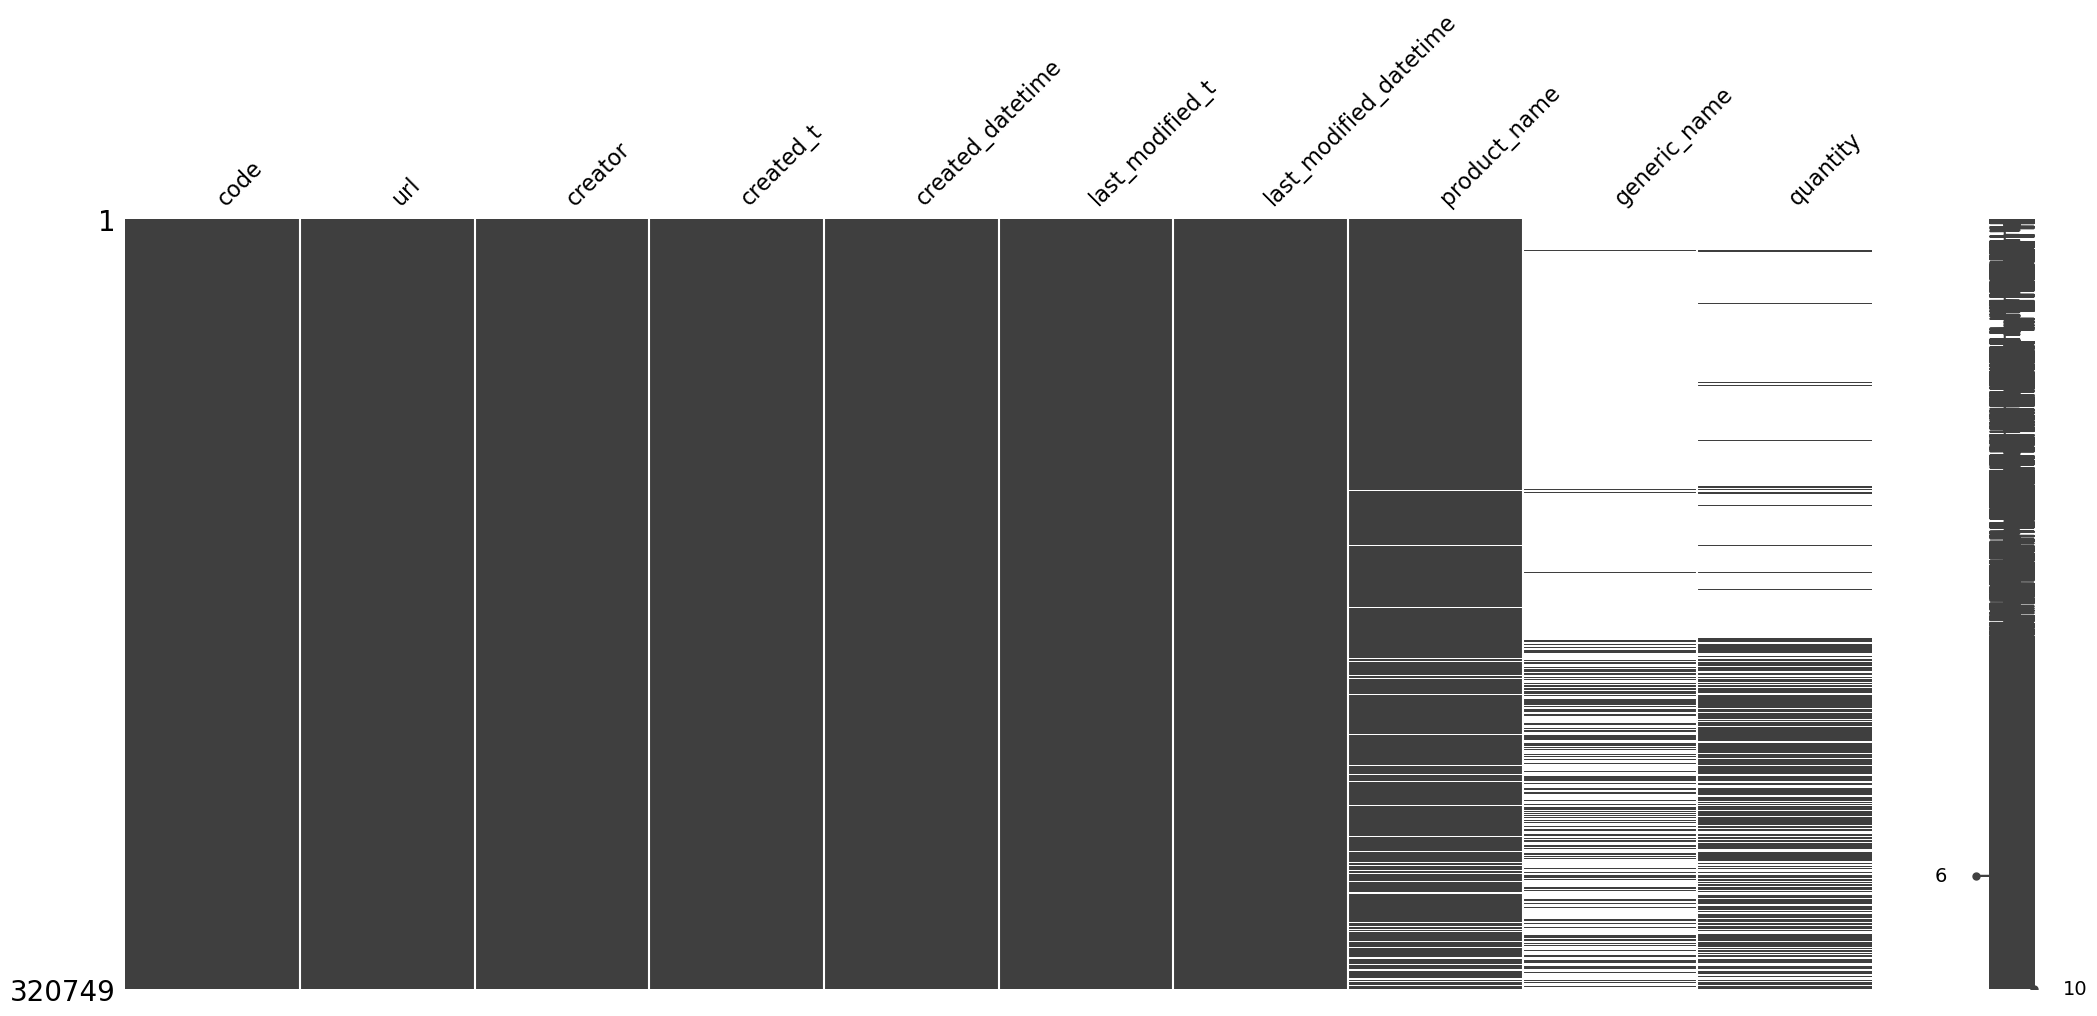

In [108]:
#les variables genenral
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(general_information)]]);

In [109]:
# general_information

In [110]:
openfoodfacts[~openfoodfacts.quantity.isna()].sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,from_palm_oil_n
218027,3266191021614,http://world-fr.openfoodfacts.org/produit/3266...,segundo,1467750055,2016-07-05T20:20:55Z,1468389950,2016-07-13T06:05:50Z,Mélange Trois baies,NaN,45 g,"Flacon,Verre,Bouchon,Plastique","flacon,verre,bouchon,plastique",La Vie Claire,la-vie-claire,Poivres,"en:plant-based-foods-and-beverages,en:plant-ba...","Aliments et boissons à base de végétaux,Alimen...",NaN,NaN,France,france,"Bio,Bio européen,FR-BIO-01,AB Agriculture Biol...","en:organic,en:eu-organic,en:fr-bio-01,fr:ab-ag...","Bio,Bio européen,FR-BIO-01,AB Agriculture Biol...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,France,en:france,France,"poivre noir, poivre blanc, baies roses.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[ poivre-noir -> fr:poivre-noir ] [ poivre ...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:spices,Epices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207562,

In [111]:
# general_information
col_to_drop += [ 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'quantity']

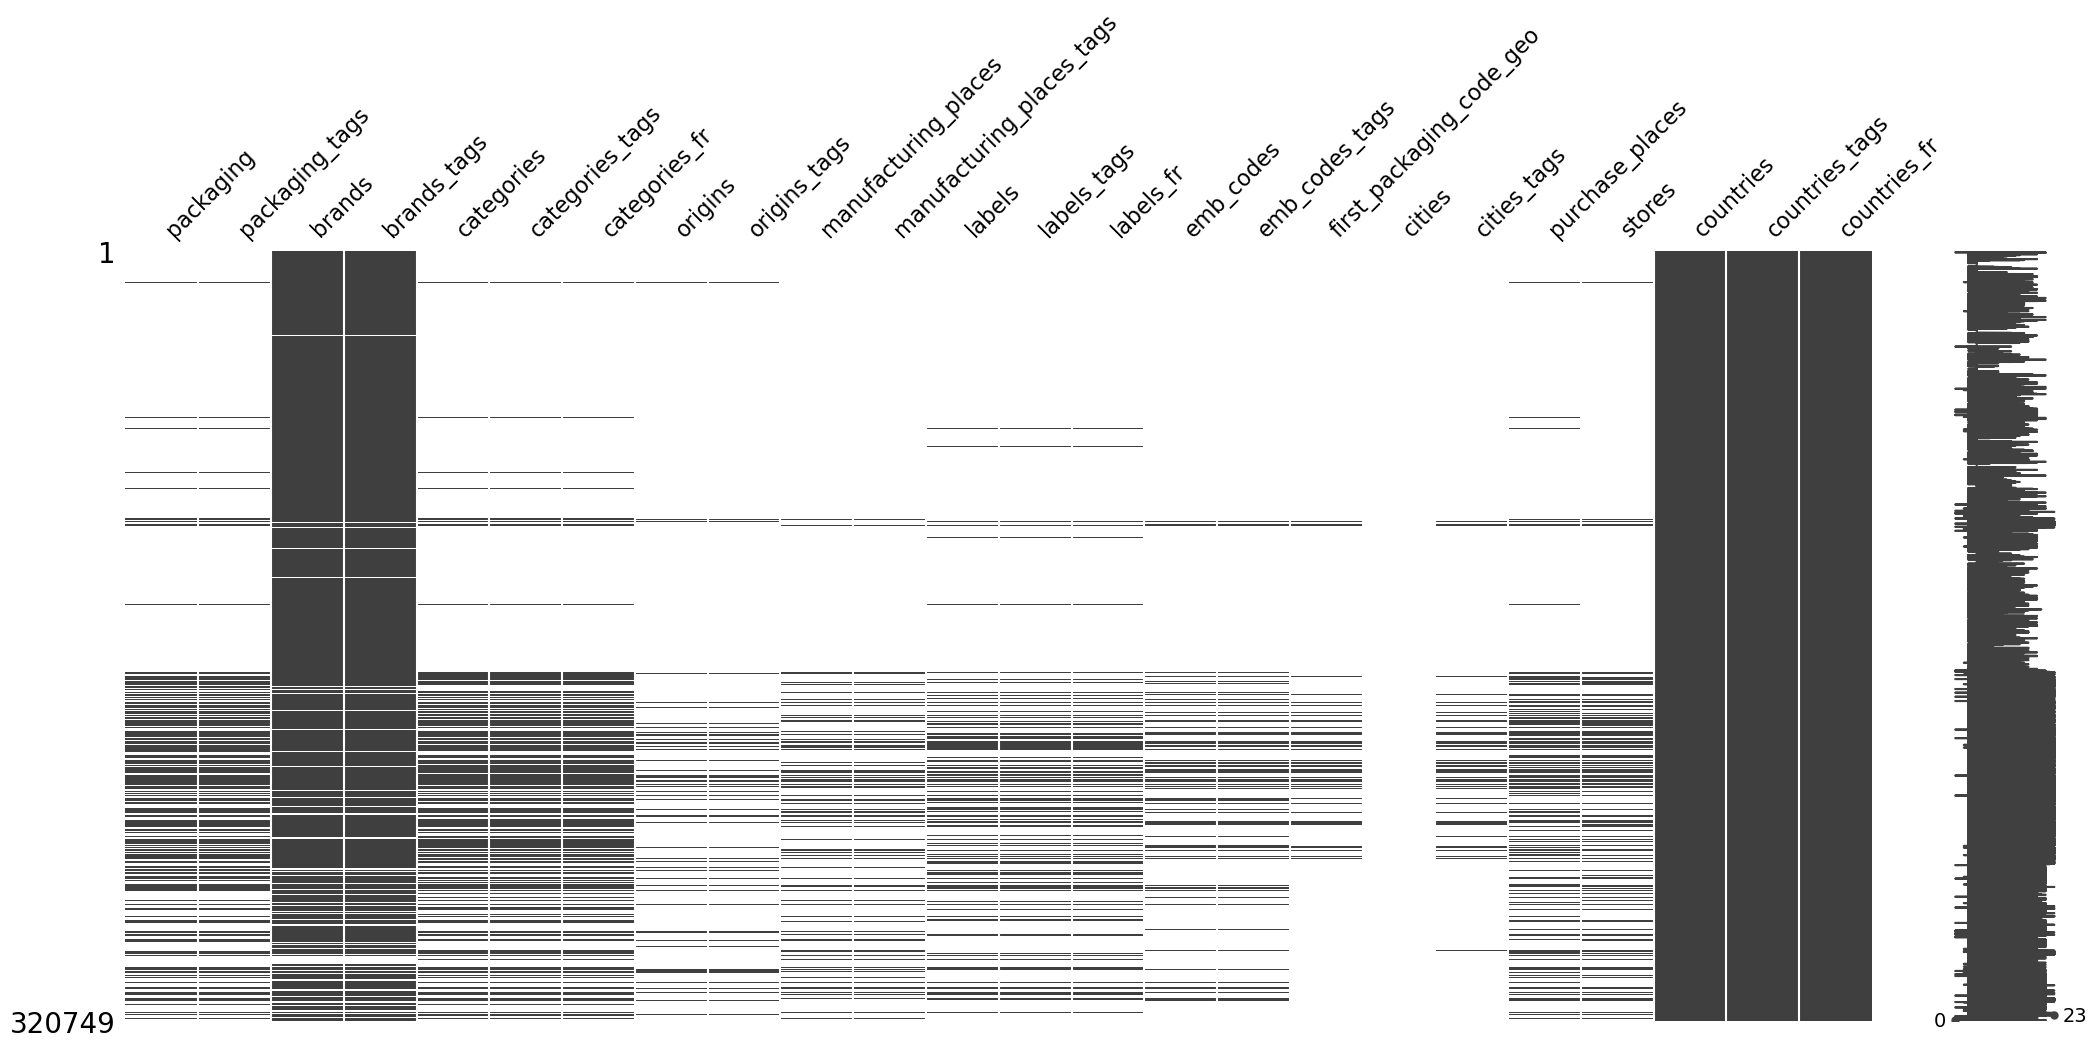

In [112]:
#les variables tags
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(tags)]]);

In [113]:
# tags
col_to_drop += [ 'packaging',
 'packaging_tags',
 
 'emb_codes',
 'emb_codes_tags',
 'first_packaging_code_geo',
 
 'purchase_places',
 'stores']


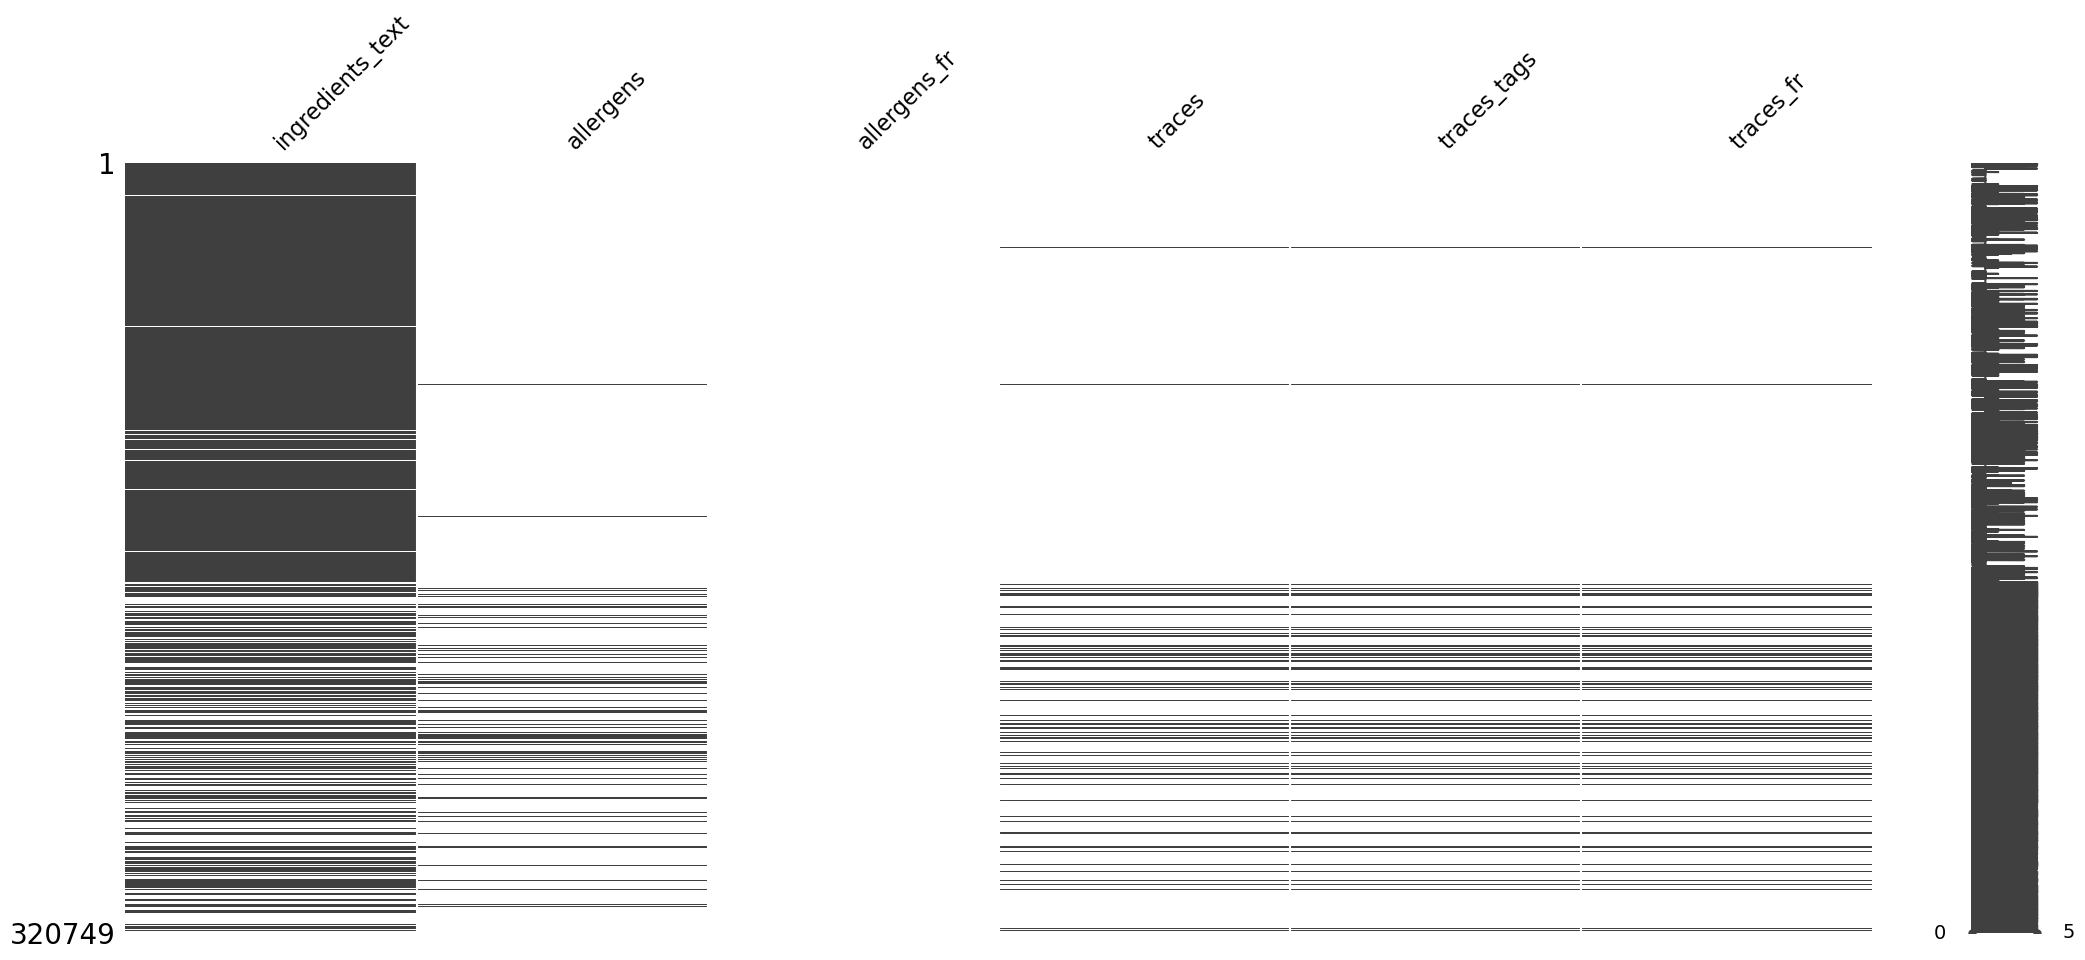

In [114]:
#les variables ingredients
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(ingredients)]]);

In [115]:
# ingredients
col_to_drop += ['allergens',
 'allergens_fr',
 'traces',
 'traces_tags',
 'traces_fr']

In [116]:
openfoodfacts[~openfoodfacts.ingredients_text.isna()].sample(5)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,from_palm_oil_n
284701,7044610871196,http://world-fr.openfoodfacts.org/produit/7044...,stiell,1477513568,2016-10-26T20:26:08Z,1477714448,2016-10-29T04:14:08Z,Solo Super,Appelsinbrus uten tilsatt sukker,1.5 l,Bottle,bottle,Solo,solo,"Beverages,Plant-based beverages,Artificially s...","en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso...",NaN,NaN,NaN,NaN,No added sugar,"en:low-or-no-sugar,en:no-added-sugar","Peu ou pas de sucre,Sans sucre ajouté",NaN,NaN,NaN,NaN,NaN,Norway,NaN,Norway,en:norway,Norvège,"Kullsyreholdig vann, 7 % appelsinjuice fra kon...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,[ kullsyreholdig-vann -> no:kullsyreholdig-va...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,c,Beverages,Non-sugared beverages,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","A vérifier,Complet,Informations nutritionnelle...",en:diet-sodas,Sodas light,NaN,NaN,13.0,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.70,0.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,0.00000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,NaN,NaN,NaN
108997,0096162618023,http://wo

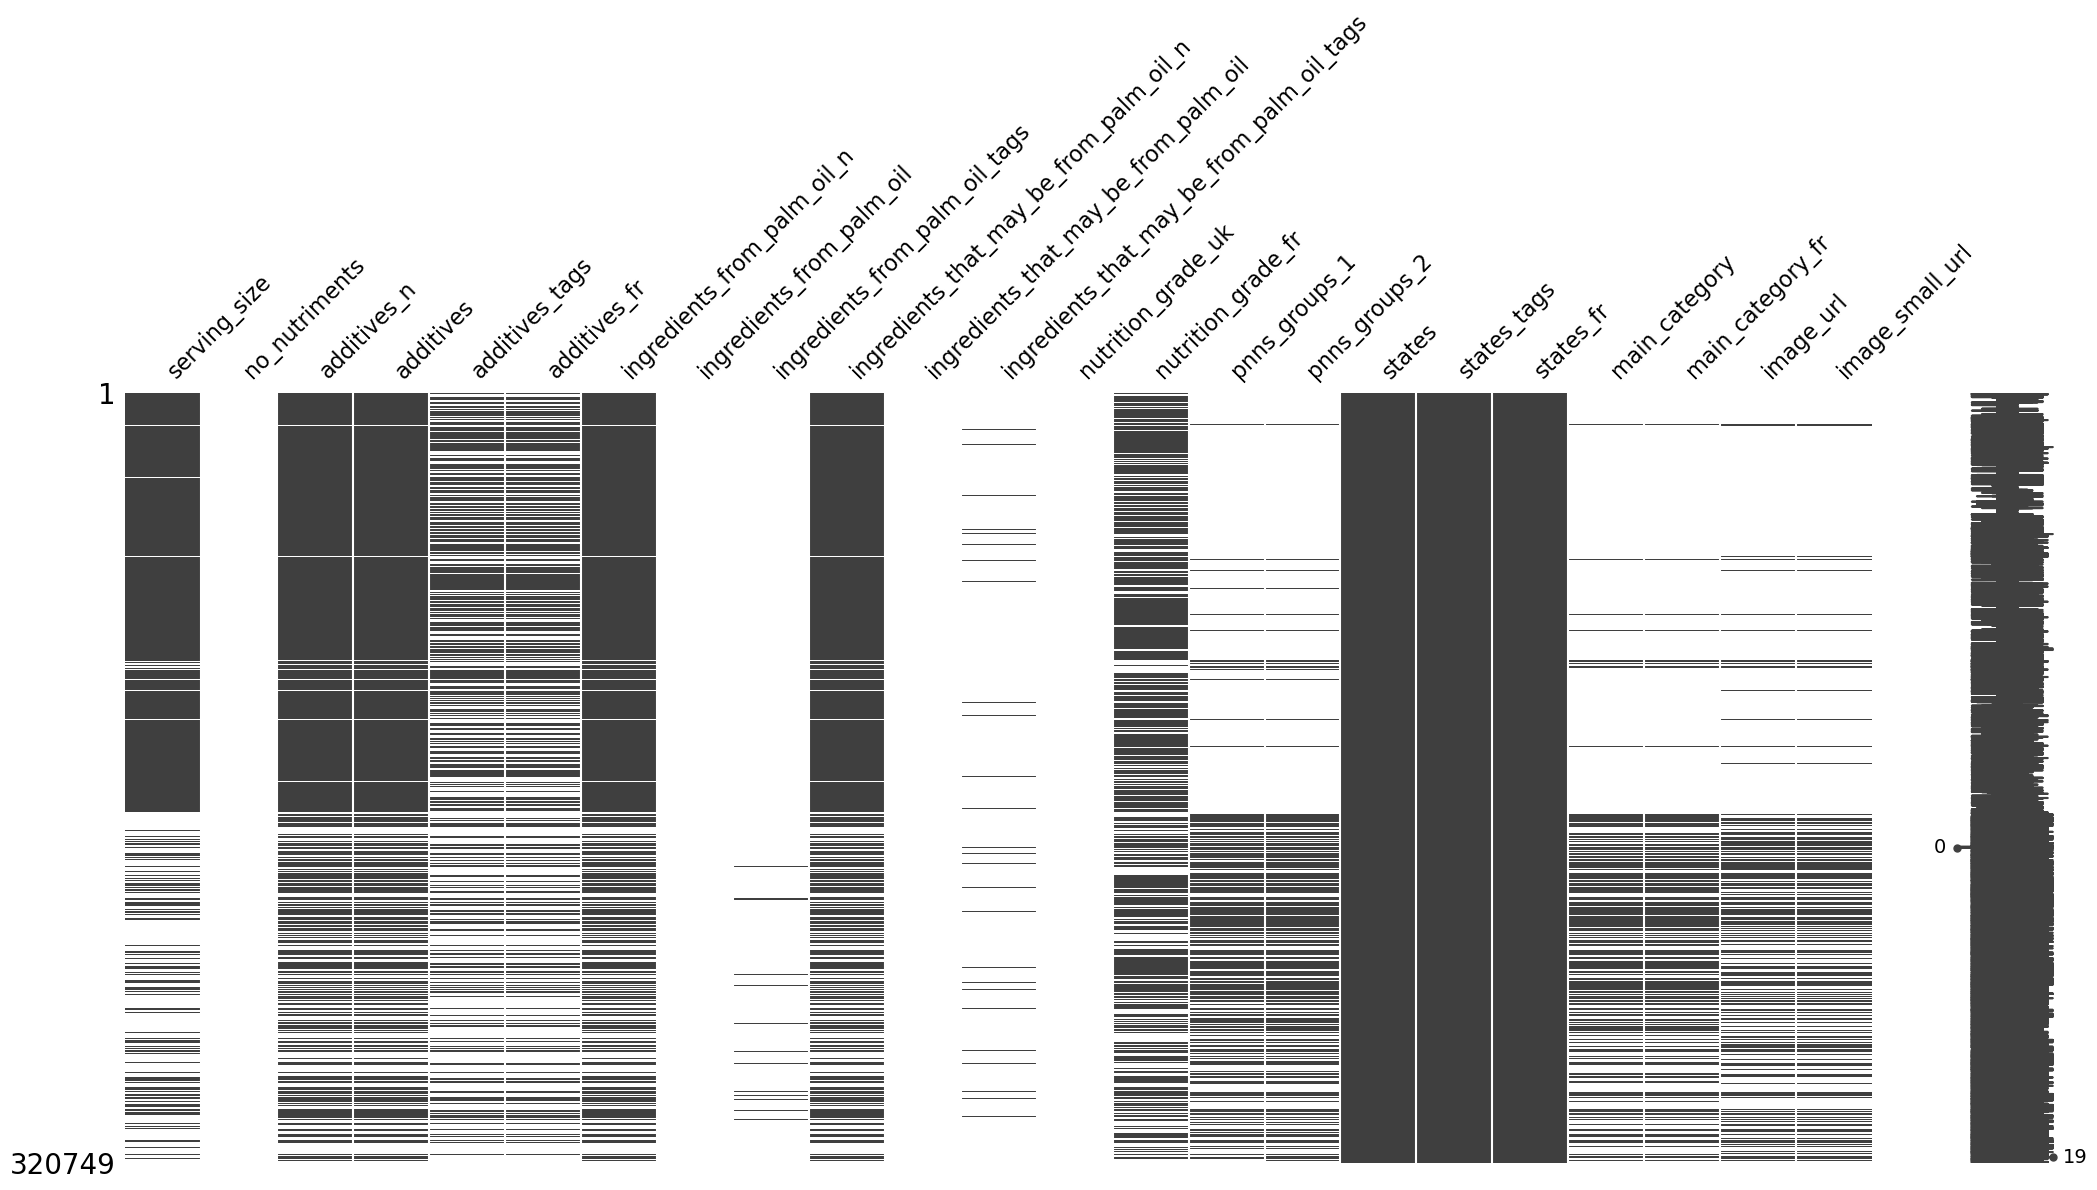

In [117]:
#les variables misc_data
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(misc_data)]]);

In [118]:
# misc_data
col_to_drop += ['serving_size',
 'no_nutriments',

 'additives',
 'additives_tags',
 'additives_fr',

'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil',
 'ingredients_that_may_be_from_palm_oil_tags',
                
 'nutrition_grade_uk',
                


 'states',
 'states_tags',
 'states_fr',

 'image_url',
 'image_small_url']

In [119]:

misc_data = nomColonnes.Colonnes[40:63].values.tolist()              #23
nutrition_facts = nomColonnes.Colonnes[63:157].values              #96
score_foot_print = nomColonnes.Colonnes[157:160].values.tolist()              #3

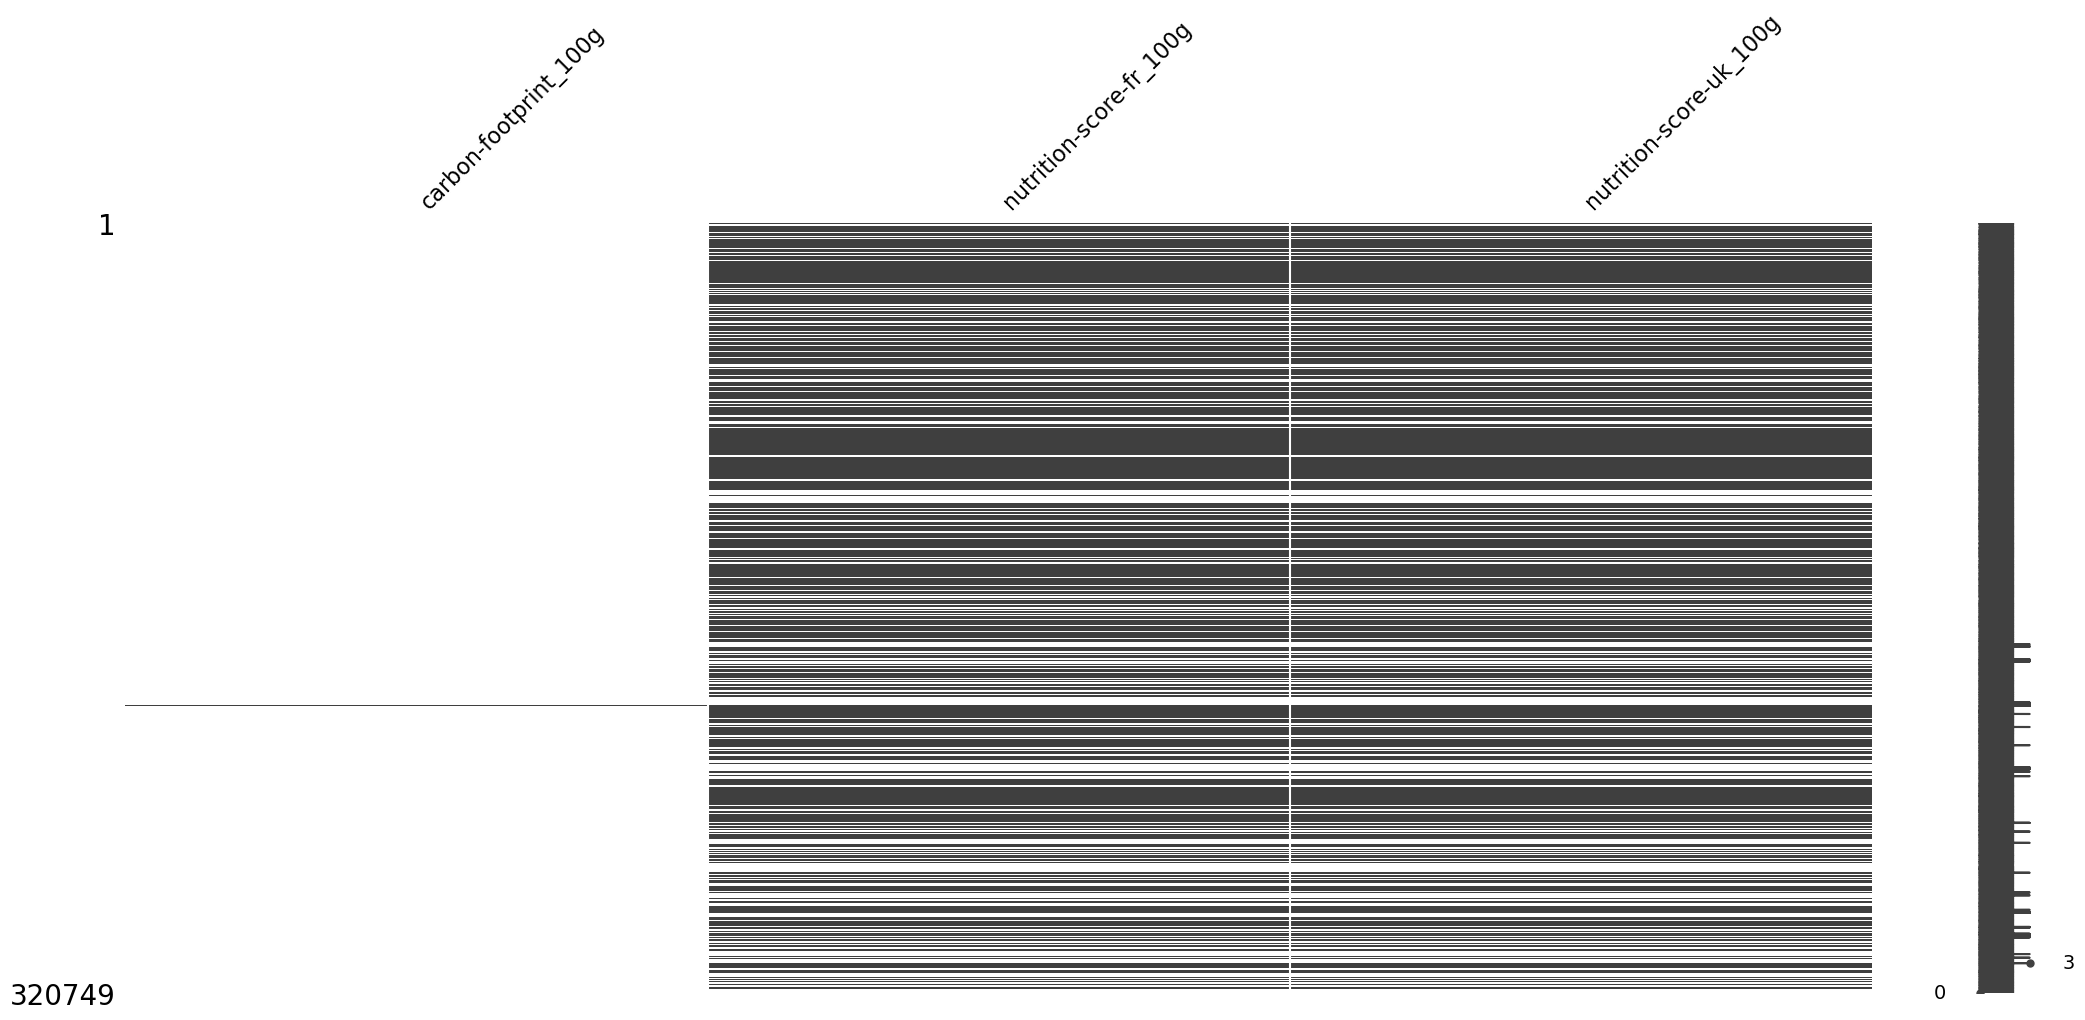

In [120]:
#les variables score_foot_print
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(score_foot_print)]]);

In [121]:
# score_foot_print
col_to_drop += ['carbon-footprint_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']

In [122]:
openfoodfacts[['carbon-footprint_100g', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']].isna().sum()/nbLigne

carbon-footprint_100g      0.999164
nutrition-score-fr_100g    0.310333
nutrition-score-uk_100g    0.310333
dtype: float64

In [123]:
openfoodfacts[[ 'nutrition-score-fr_100g', 'nutrition-score-uk_100g']].corr()

,nutrition-score-fr_100g,nutrition-score-uk_100g
nutrition-score-fr_100g,1.00000,0.98622
nutrition-score-uk_100g,0.98622,1.00000


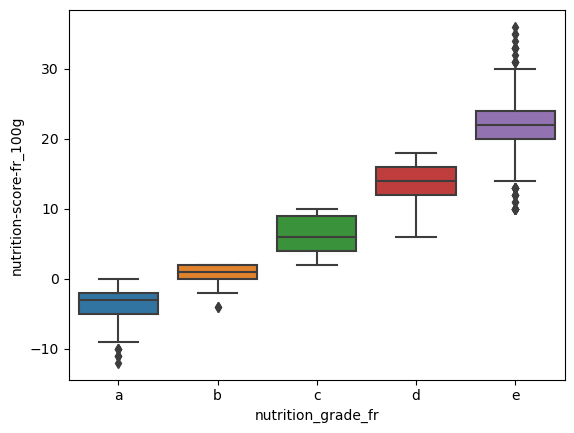

In [130]:
#openfoodfacts[[ 'nutrition-score-fr_100g', 'openfoodfacts.nutrition_grade_fr']].boxplot()
sns.boxplot(y='nutrition-score-fr_100g',
            x='nutrition_grade_fr',
            data=openfoodfacts.sample(10000).sort_values(by='nutrition_grade_fr'));

In [201]:
openfoodfacts[~openfoodfacts.states.isna()][ ['code','product_name','generic_name', 'quantity'] + misc_data].sample(5)

,code,product_name,generic_name,quantity,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url
63815,0052100020204,Chili Powder,NaN,NaN,0.5 g (0.25 tsp),NaN,1.0,[ chili-pepper -> en:chili-pepper ] [ peppe...,en:e551,E551 - Dioxyde de silicium,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN
54401,0042222847308,"Turkey Breast, Applewood Smoked",NaN,NaN,56 g (2 ONZ),NaN,0.0,[ turkey-breast-meat -> en:turkey-breast-meat...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,c,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN
37875,0041130599187,Finnska Black Licorice,NaN,NaN,40 g (7 PIECES | ABOUT),NaN,6.0,[ syrup -> en:syrup ] [ beet-sugar -> en:be...,"en:e420,en:e500ii,en:e150a,en:e412,en:e901,en:...","E420 - Sorbitol,E500ii - Hydrogénocarbonate de...",0.0,NaN,NaN,0.0,NaN,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN
52436,0041735011145,Sweetened Whole Grain Oat Cereal With Real Honey,NaN,NaN,30 g (1 cup),NaN,4.0,[ whole-grain-oat-flour -> en:whole-grain-oat...,"en:e339iii,en:e150a,en:e101,en:e375","E339iii - Phosphate de sodium tribasique,E150a...",0.0,NaN,NaN,0.0,NaN,NaN,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN
166561,0859098005868,Blackened Mahi Mahi,NaN,NaN,85 g (1 BURGER),NaN,2.0,[ mahi-mahi -> en:mahi-mahi ] [ mahi -> en:...,"en:e340ii,en:e554","E340ii - Phosphate dipotassique,E554 - Silicat...",0.0,NaN,NaN,0.0,NaN,NaN,NaN,b,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN


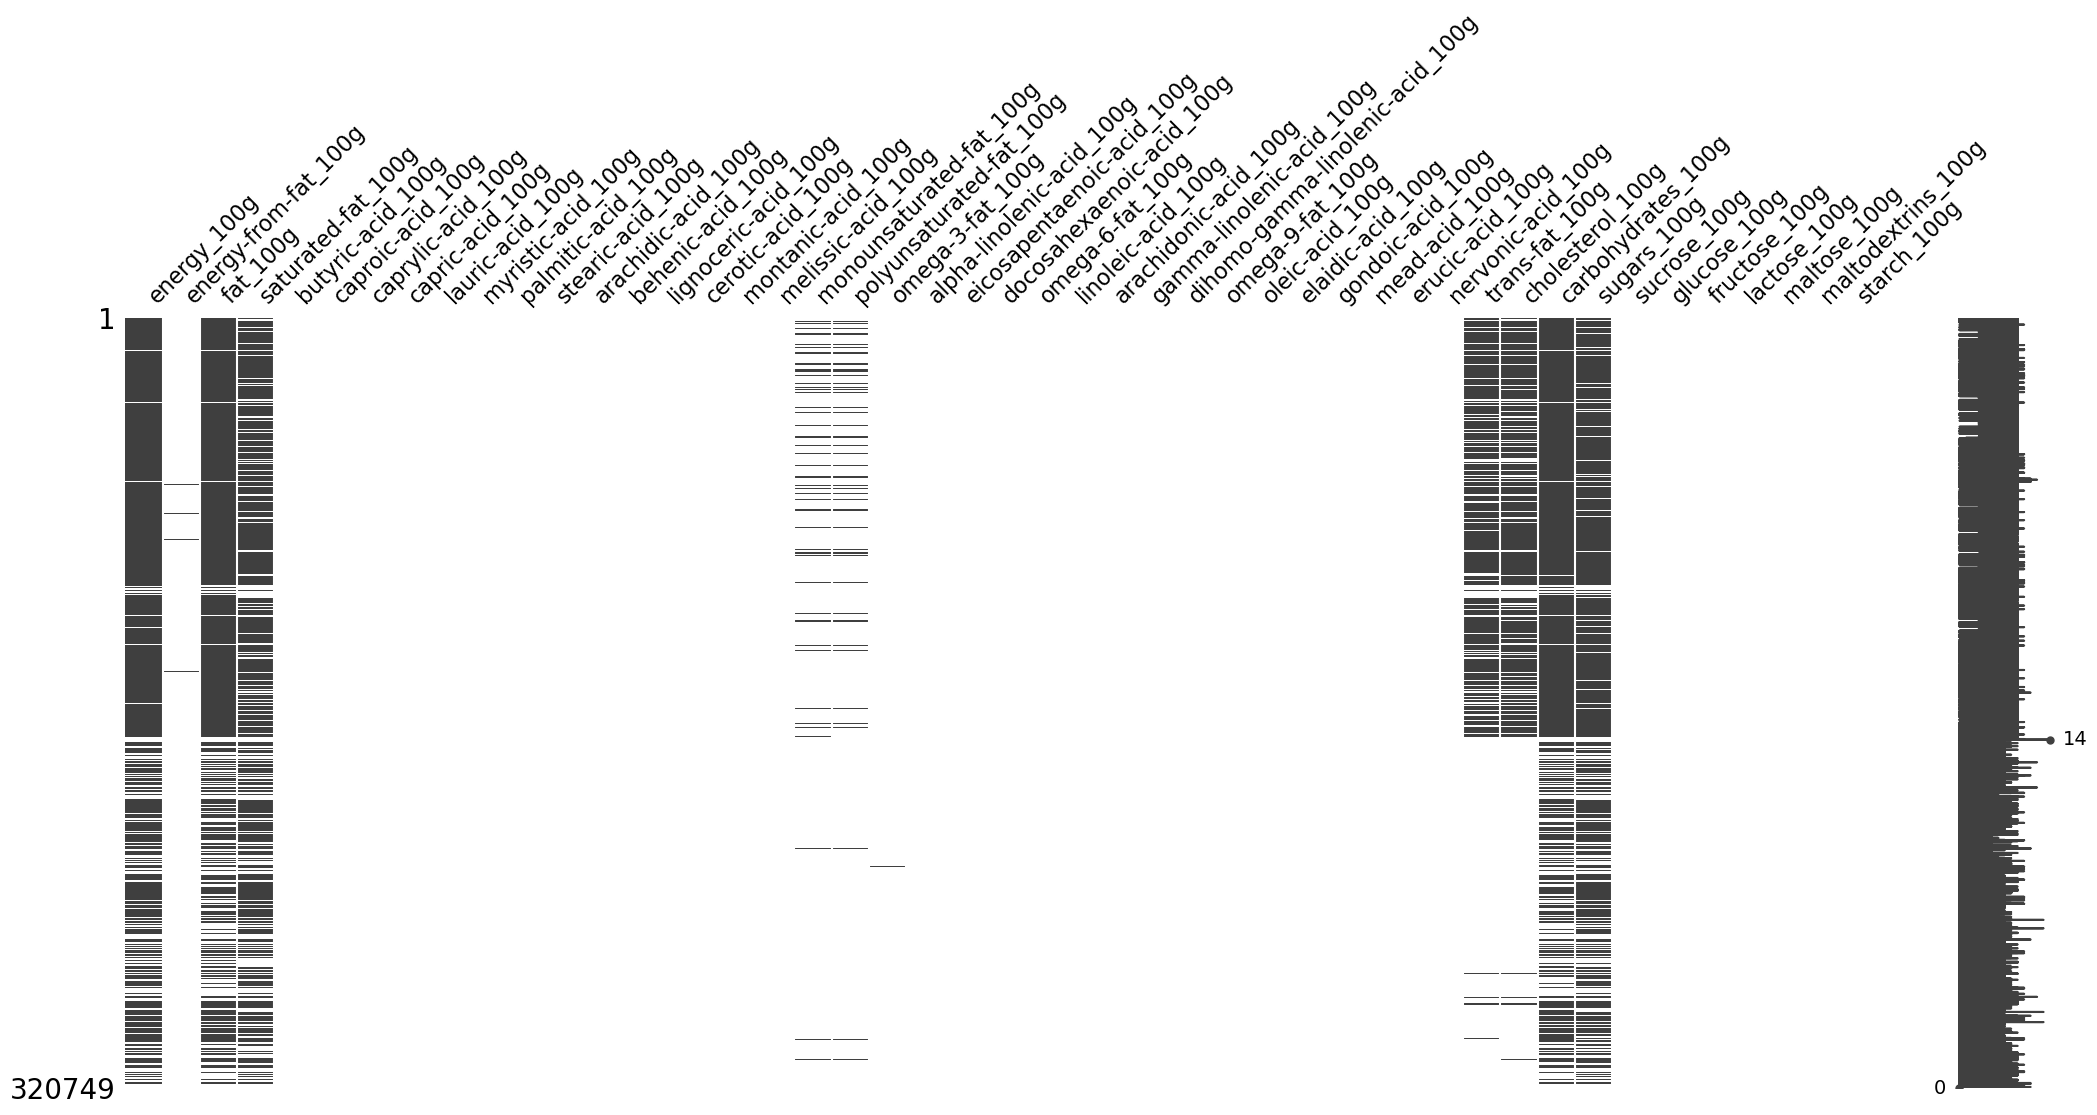

In [134]:
#les variables nutrition_facts
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(nutrition_facts)][:47] ]);

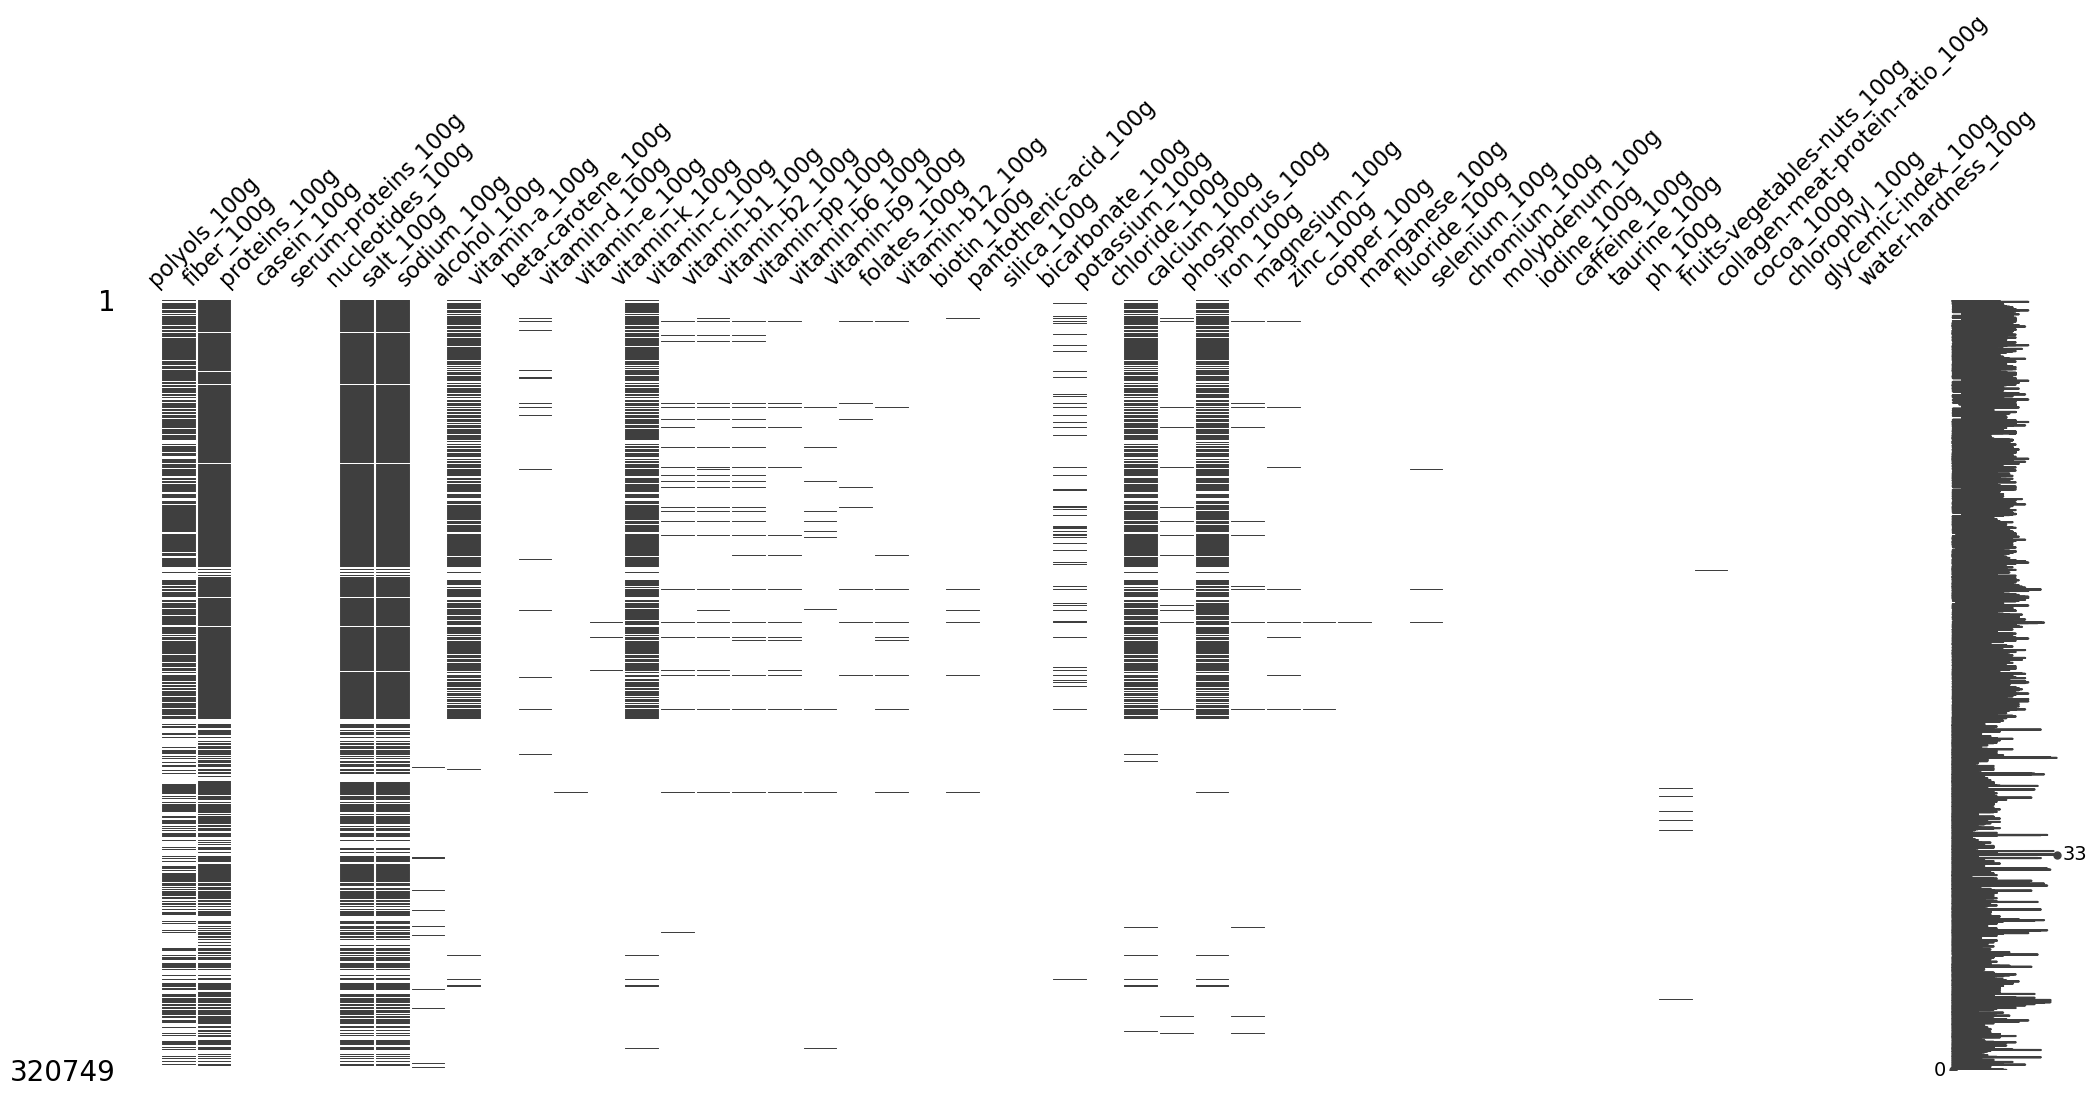

In [135]:
#les variables nutrition_facts
msno.matrix(openfoodfacts.loc[:,openfoodfacts.columns[openfoodfacts.columns.isin(nutrition_facts)][47:] ]);

### les correlations

#### general_information

</br>

####

In [ ]:
%%time
msno.heatmap(openfoodfacts.iloc[:,:20].sample(250));
msno.dendrogram(openfoodfacts.iloc[:,:20].sample(250));

####

In [ ]:
%%time
msno.heatmap(openfoodfacts.iloc[:,:20].sample(250));
msno.dendrogram(openfoodfacts.iloc[:,:20].sample(250));

####

In [ ]:
%%time
msno.heatmap(openfoodfacts.iloc[:,:20].sample(250));
msno.dendrogram(openfoodfacts.iloc[:,:20].sample(250));

####

In [ ]:
%%time
msno.heatmap(openfoodfacts.iloc[:,:20].sample(250));
msno.dendrogram(openfoodfacts.iloc[:,:20].sample(250));

####

In [ ]:
%%time
msno.heatmap(openfoodfacts.iloc[:,:20].sample(250));
msno.dendrogram(openfoodfacts.iloc[:,:20].sample(250));

In [139]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(openfoodfacts.isnull())
PCA(n_components=2)

PCA(n_components=2)

<AxesSubplot:>

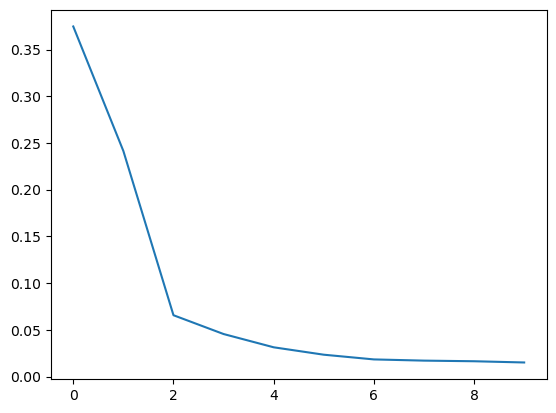

In [146]:
sns.lineplot(y = pca.explained_variance_ratio_[:10],x=range(10))

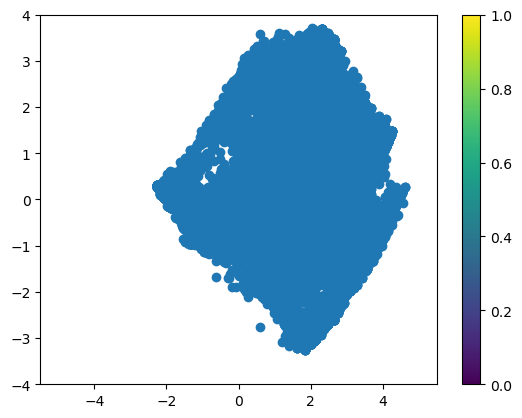

In [148]:
import matplotlib.pyplot as plt


# projeter X sur les composantes principales
X_projected = pca.transform(openfoodfacts.isnull())

# afficher chaque observation
plt.scatter(X_projected[:, 0], X_projected[:, 1])
    # colorer en utilisant la variable 'Rank'
    #c=data.Rank)

plt.xlim([-5.5, 5.5])
plt.ylim([-4, 4])
plt.colorbar()

(-0.7, 0.7)

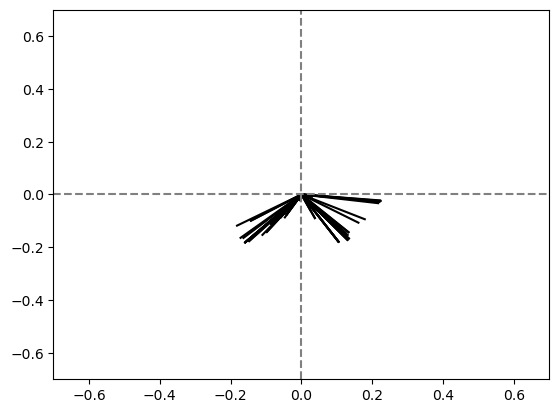

In [151]:
pcs = pca.components_

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, openfoodfacts.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlim([-0.7, 0.7])
plt.ylim([-0.7, 0.7])